# Start

**Import the necesary libraries**

Import necesary libraries to start, however more libraries are going to be imported further ahead

In [1]:
import pandas as pd
import calendar
import seaborn as sns
import time
import tensorflow as tf
import numpy as np
import scipy.stats as stats
import dataframe_image as dfi

from matplotlib import pyplot as plt
%matplotlib inline
from math import sqrt

print('Libraries have been imported !')

Libraries have been imported !


## Dataset

Open the excel file and open the sheet named:  '6. Precio OIC Mensual'
Delete the first 5 Rows and rename the Columns

In [2]:
# to use the URL
#file = 'https://federaciondecafeteros.org/app/uploads/2020/01/Precios-%C3%A1rea-y-producci%C3%B3n-de-caf%C3%A9.xlsx'

# to use the local file
file = pd.ExcelFile('Precios-área-y-producción-de-café.xlsx')

# name of the sheet '6. Precio OIC Mensual'
df = pd.read_excel(file, sheet_name = '6. Precio OIC Mensual')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Precios indicativos OIC por grupos - Promedio ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Centavos de dólar por libra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Fuente: ICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Suaves colombianos (arábigo),NaN,NaN,Otros suaves (arábigo),NaN,NaN,Naturales del Brasil (arábigo),NaN,NaN,Robustas,NaN,NaN,NaN


In [3]:
# removes the first column as it doesn't have any data
df = df.drop(df.columns[[0,-1]], axis = 1)

# remove the first 5 columns as is part of the format in the excel file
df = df.drop(index = df.index[0:6],
       axis = 0)

# because the first 5 rows where deleted, I need to reset the index to be 0 and not to start at row # 6
df = df.reset_index(drop=True)

In [4]:
# renames the column for an easier comprenhesion 
df = df.rename(columns = {'Unnamed: 1': 'Date', 'Unnamed: 2':'OIC_price',
                          'Unnamed: 3':'Colombia_ny', 'Unnamed: 4':'Colombia_europe', 'Unnamed: 5':'Colombia_average',
                          'Unnamed: 6':'Other_ny', 'Unnamed: 7':'Other_europe','Unnamed: 8':'Other_average',
                          'Unnamed: 9':'Brazil_ny', 'Unnamed: 10':'Brazil_europe', 'Unnamed: 11':'Brazil_average',
                          'Unnamed: 12':'Robustas_ny', 'Unnamed: 13':'Robustas_europe','Unnamed: 14':'Robustas_average'})
df.head()

,Date,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
0,2000-01-01 00:00:00,82.15,130.12,124.36,130.13,109.17,116.82,111.11,97.67,103.1,97.68,53.62,52.41,53.18
1,2000-02-01 00:00:00,76.15,124.72,118.67,124.73,101.17,110.19,103.44,91.51,96.58,91.51,49.41,47.97,48.85
2,2000-03-01 00:00:00,73.49,119.51,115.78,119.51,98.26,108.13,100.73,89.93,94.78,89.93,47.26,44.73,46.25
3,2000-04-01 00:00:00,69.53,112.67,109.12,112.67,92.41,101.51,94.61,86.46,90.7,86.46,45.21,43.31,44.45
4,2000-05-01 00:00:00,69.22,110.31,107.85,110.31,91.76,100.99,94.17,87.23,91.01,87.23,45.19,43.01,44.32


## Exploratory Data Analysis

**Description of each Column**

**Date:** Column expressing the date montly beginning January of 2000, all prices will have a reference for this date.

**OIC_price:** Is the average price of the International Coffee Organization for the month and year shown, measured in US cents/lb

**Colombia_ny:** Is the average price of Colombian Mild Arabicas for the month and year shown and is expresed in US cents/lb, in the US market

**Colombia_europe:** Is the average price of Colombian Mild Arabicas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Colombia_average:** Is the weighted average Colombian Mild Arabicas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expresed in US cents/lb

**Other_ny:** Is the average price of Other Mild Arabicas for the month and year shown and is expresed in US cents/lb, in the US market

**Other_europe:**  Is the average price of Other Mild Arabicas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Other_average:** Is the average price of Other Mild Arabicas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**Brazil_ny:** Is the average price of Brazilian Naturals for the month and year shown and is expresed in US cents/lb, in the US market

**Brazil_europe:**  Is the average price of Brazilian Naturals for the month and year shown and is expresed in US cents/lb, in Germany and France

**Brazil_average:** Is the average price of Brazilian Naturals Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**Robustas_ny:** Is the average price of Robustas for the month and year shown and is expresed in US cents/lb, in the US market

**Robustas_europe:** Is the average price of Robustas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Robustas_average:** Is the average price of Robustas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**[Indicator Prices SC-106/21 ]** (https://www.ico.org/documents/cy2020-21/sc-106e-rules-indicator-prices.pdf)

Checking how many NA's are there in the dataset, what type of each column is, how many columns we have and in general all the information from the data 

In [5]:
# create a copy of the data frame to modify it and to keep the original intact
eda = df.copy()

# checking that both dataframes are diffetent in memory
print(f' Memory for df: {id(df)} ----- Memory for eda: {id(eda)}')

 Memory for df: 2075769587024 ----- Memory for eda: 2075769587936


In [6]:
# exploring the data types, the amount of row and if there are NA's
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              272 non-null    object
 1   OIC_price         272 non-null    object
 2   Colombia_ny       272 non-null    object
 3   Colombia_europe   272 non-null    object
 4   Colombia_average  272 non-null    object
 5   Other_ny          272 non-null    object
 6   Other_europe      272 non-null    object
 7   Other_average     272 non-null    object
 8   Brazil_ny         272 non-null    object
 9   Brazil_europe     272 non-null    object
 10  Brazil_average    272 non-null    object
 11  Robustas_ny       272 non-null    object
 12  Robustas_europe   272 non-null    object
 13  Robustas_average  272 non-null    object
dtypes: object(14)
memory usage: 29.9+ KB


There are a total of 14 Columns, each with 272 rows, and the type of data per column is the type Object that is like a String type, which will have to be converted to float type and time series for the column Date

In [7]:
# checking if tehre are NA's 
eda.isna().sum()

Date                0
OIC_price           0
Colombia_ny         0
Colombia_europe     0
Colombia_average    0
Other_ny            0
Other_europe        0
Other_average       0
Brazil_ny           0
Brazil_europe       0
Brazil_average      0
Robustas_ny         0
Robustas_europe     0
Robustas_average    0
dtype: int64

There are 272 rows 

The data does not have NA’s or empty cells

**Duplicates on each column**

Colombia_europe [20 - 40] On years 2001-09 and 2003-05, it was exactly the same price of the coffe

Brazil_ny[75 - 89] On years 2006-04 and 2007-06, it was exactly the same price of the coffe

Other_ny [158 - 159] On years 2013-03 and 2013-04, it was exactly the same price of the coffe

Other_europe [29 - 41] On years 2002-06 and 2003-06, it was exactly the same price of the coffe

Robustas_europe [118 - 119 - 130 - 183] On years 2010-11 and 2020-04, it was exactly the same price of the coffe

Robustas_ny [35 - 39] On years 2002-12 and 2003-04, it was exactly the same price of the coffe


In [8]:
# checking if there are duplicated values 
dup_OIC = eda[eda.duplicated(['OIC_price'],keep = False)]
dup_Col_ny = eda[eda.duplicated(['Colombia_ny'],keep = False)]
dup_Col_europe = eda[eda.duplicated(['Colombia_europe'],keep = False)]
dup_Col_average = eda[eda.duplicated(['Colombia_average'],keep = False)]
dup_Other_ny= eda[eda.duplicated(['Other_ny'],keep = False)]
dup_Other_europe= eda[eda.duplicated(['Other_europe'],keep = False)]
dup_Other_average= eda[eda.duplicated(['Other_average'],keep = False)]
dup_Brazil_ny= eda[eda.duplicated(['Brazil_ny'],keep = False)]
dup_Brazil_europe= eda[eda.duplicated(['Brazil_europe'],keep = False)]
dup_Brazil_average= eda[eda.duplicated(['Brazil_average'],keep = False)]
dup_Robustas_ny= eda[eda.duplicated(['Robustas_ny'],keep = False)]
dup_Robustas_europe= eda[eda.duplicated(['Robustas_europe'],keep = False)]
dup_Robustas_average= eda[eda.duplicated(['Robustas_average'],keep = False)]
#print(dup_Robustas_europe)

The types of the columns are object, Changing them for numeric type float, so we can see the statistics

In [9]:
# changes the format of the column 'Date' for just the year and the month
eda['Date'] = pd.to_datetime(eda['Date'], format = '%d%m%Y')

lista = list(eda.columns)
lista.pop(0)

for item in lista:
    eda[item] = eda[item].astype(float)
    
#checking descriptive statistics
eda.describe()

# saves the table as a png or svg
#df_styled = eda.describe().style.background_gradient()
#dfi.export(df_styled, "table statistics.png")

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,113.633237,153.333888,148.409523,151.222932,145.099616,143.098234,143.966330,118.365112,123.408718,121.959193,79.670588,74.456376,75.376692
std,43.687941,62.437782,59.732402,61.156478,58.414410,55.916915,56.927377,49.732689,51.170812,50.984818,28.448193,26.567300,26.767165
min,41.170000,58.920000,57.720000,58.100000,51.950000,55.760000,54.280000,37.670000,38.710000,38.630000,21.250000,22.790000,22.810000
25%,88.547500,112.940000,111.697500,112.670000,108.720000,110.295000,109.712500,94.405000,96.056883,95.605714,57.895000,54.765000,55.347500
50%,113.155682,144.413636,141.123636,143.529552,141.896818,138.104348,140.704773,111.980000,117.983409,116.833333,84.680554,78.150682,79.203636
75%,133.130252,182.577237,178.760455,179.022500,169.232857,165.942045,166.686126,132.726023,143.199599,140.728880,103.530147,97.329432,98.367841
max,231.240000,319.633750,311.450000,312.950000,303.590000,297.220000,300.120000,271.390000,273.430000,273.400000,126.300000,121.300000,121.980000


Note that Colombian_average maximum is almost 3 times the price of the Robustas_average which is predominantly from Vietnam, the reason is that “Robustas has a high caffeine content (2% to 4%), so the flavor is not as pure as Arabica” (Roldan Perez et al., 2009,32), “quality of the Robusta produced is uneven because of processing technology, drying equipment and post-harvest technological problems. These cause the coffee beans to have a high humidity level, and not meet the required standard of color, quality, and so on. This is the reason that Vietnam’s coffee price is lower than the world price.” (Roldan Perez et al., 2009,32).

The 3rd Quantil (75%) of Robustas_average is below the 1st Quantil (25%) of Colombian_average and Other_average, and almost the same for the 1st Quantil (25%) of Brazil_average.


The correlation between the attributes

In [10]:
# to check the correlation
eda.corr()

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
OIC_price,1.000000,0.961247,0.974154,0.968370,0.983946,0.987328,0.986648,0.981872,0.988744,0.989057,0.902821,0.883472,0.888010
Colombia_ny,0.961247,1.000000,0.989911,0.997974,0.978964,0.978009,0.977207,0.953280,0.950817,0.952474,0.795684,0.761376,0.768793
Colombia_europe,0.974154,0.989911,1.000000,0.996692,0.979493,0.986822,0.982911,0.962704,0.967117,0.967156,0.810751,0.783200,0.789372
Colombia_average,0.968370,0.997974,0.996692,1.000000,0.981455,0.984258,0.981992,0.959397,0.959980,0.960859,0.802224,0.770656,0.777598
Other_ny,0.983946,0.978964,0.979493,0.981455,1.000000,0.995489,0.996963,0.971176,0.977323,0.977294,0.845858,0.812284,0.819485
Other_europe,0.987328,0.978009,0.986822,0.984258,0.995489,1.000000,0.997574,0.975087,0.984532,0.983430,0.841851,0.813314,0.819732
Other_average,0.986648,0.977207,0.982911,0.981992,0.996963,0.997574,1.000000,0.973195,0.981179,0.980708,0.846334,0.816121,0.822735
Brazil_ny,0.981872,0.953280,0.962704,0.959397,0.971176,0.975087,0.973195,1.000000,0.994153,0.996667,0.838267,0.819359,0.823952
Brazil_europe,0.988744,0.950817,0.967117,0.959980,0.977323,0.984532,0.981179,0.994153,1.000000,0.999492,0.856312,0.837155,0.841898
Brazil_average,0.989057,0.952474,0.967156,0.960859,0.977294,0.983430,0.980708,0.996667,0.999492,1.000000,0.854775,0.835624,0.840293


Creating a correlation matrix between all the columns, can be seen that there is a high correlation between all the averages, not that much with Robustas_average, but there is still a correlation, the lowest correlation is between Robustas_average and Colombia_ny with a value of 0.76, and with our target column which is OIC_price, the lowest correlation is Robustas_europe with 0.88

Overall, all columns have a high correlation between all of them, and it can be seen as well that the average columns have a correlation of 1 with the same group of coffee that they are averaging.


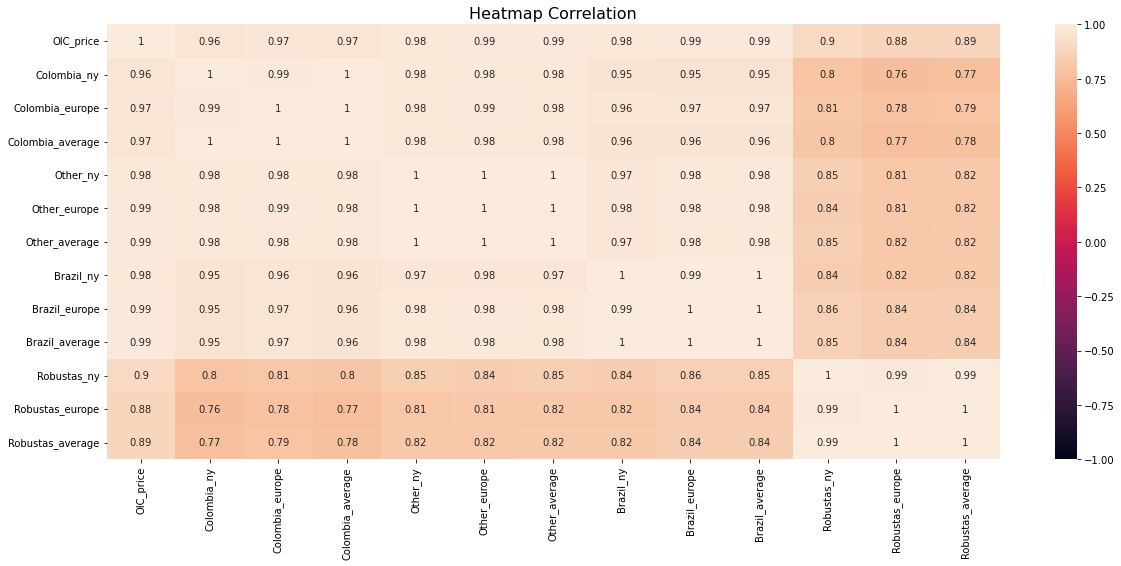

In [11]:
# checking the correlation visually on a heat map

plt.figure(figsize = (20,8))
hm = sns.heatmap(eda.corr(), annot = True, vmin = -1, vmax = 1)
hm.set_title('Heatmap Correlation', fontdict = {'fontsize':16});
#plt.savefig('Heat Map.svg')

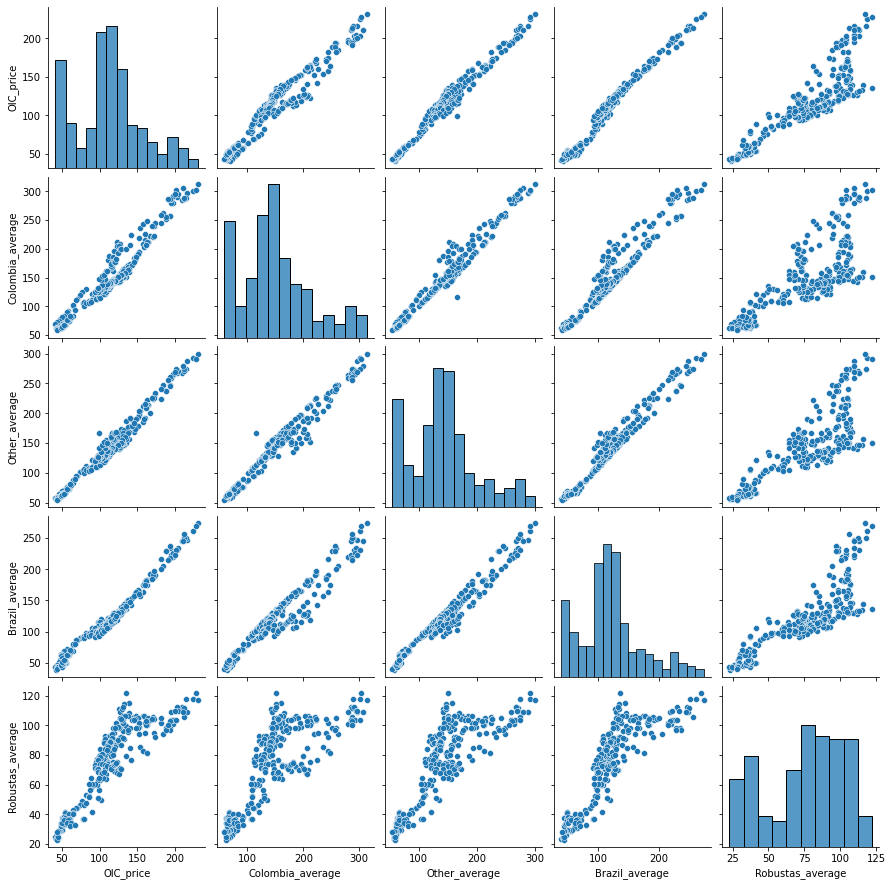

In [12]:
# Doing a scatter plot matrix just with the average columns
sns.pairplot(eda[['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']]);
#plt.savefig('scatter plot.svg')

The scatterplot between all average columns and OIC_price confirms the correlations seen above on the matrix.

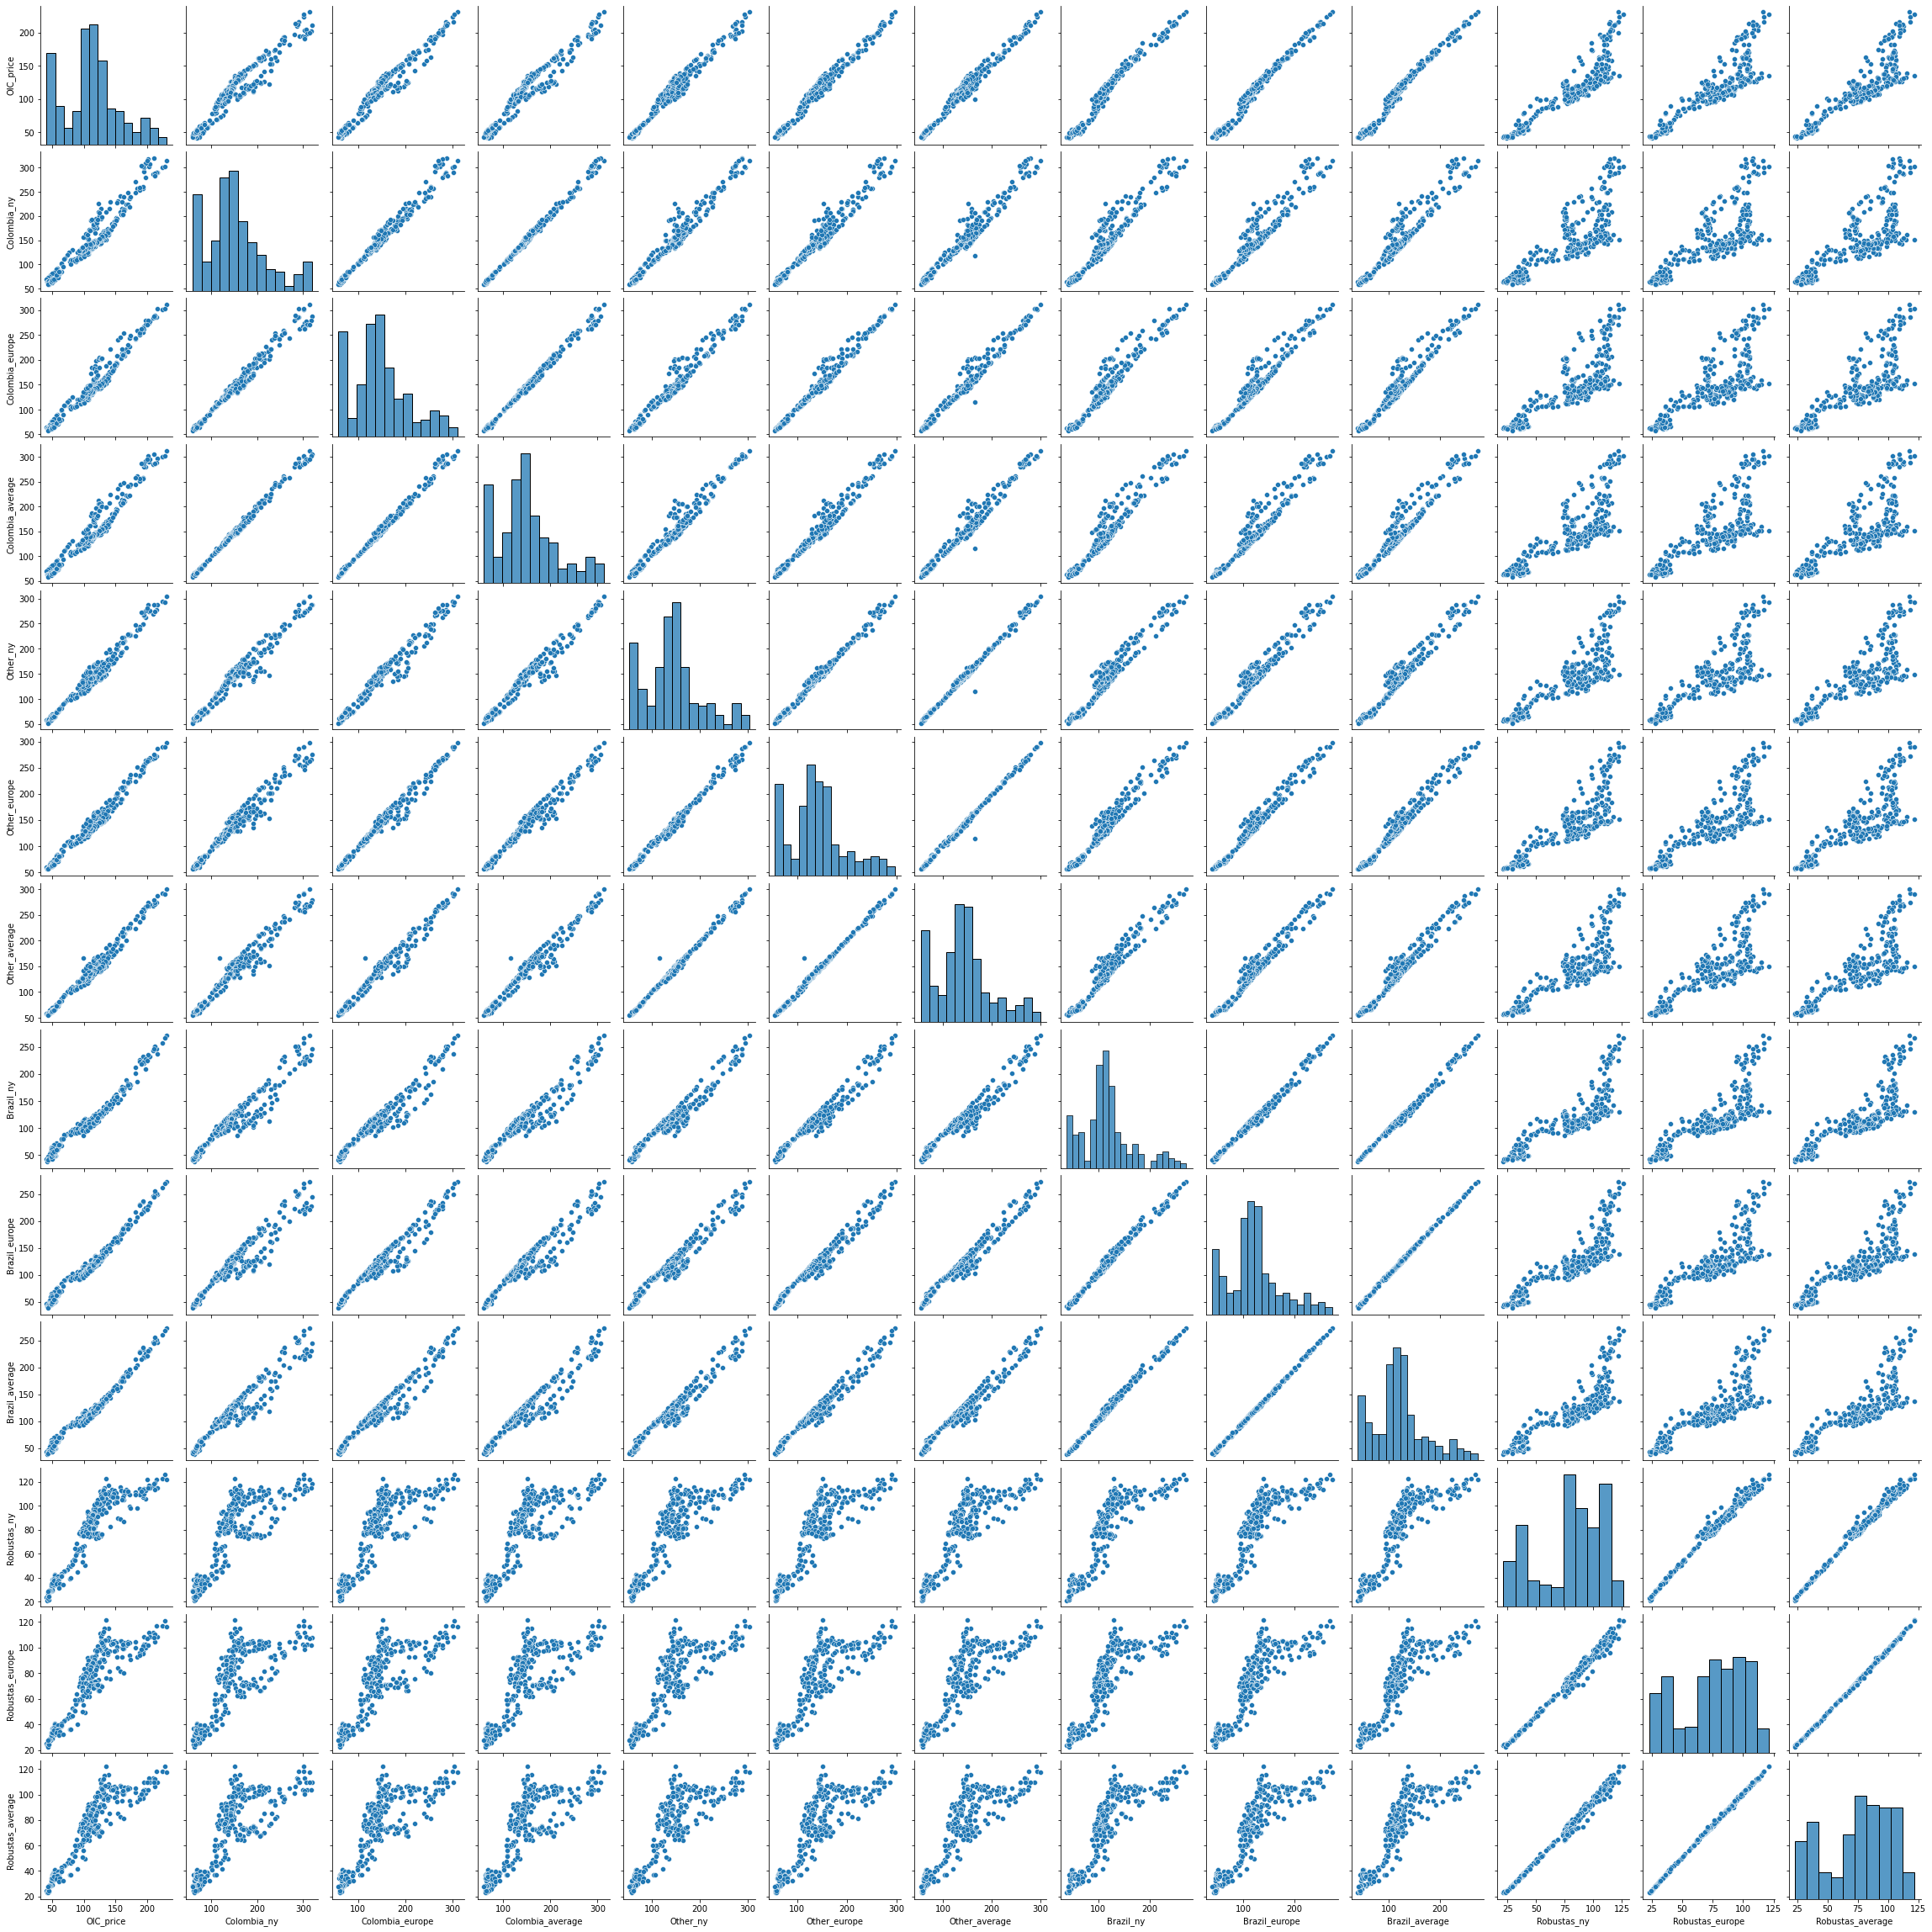

In [13]:
# Doing a scatter plot matrix with the all columns
sns.pairplot(eda[['Date', 'OIC_price', 'Colombia_ny', 'Colombia_europe',
       'Colombia_average', 'Other_ny', 'Other_europe', 'Other_average',
       'Brazil_ny', 'Brazil_europe', 'Brazil_average', 'Robustas_ny',
       'Robustas_europe', 'Robustas_average']]);
#plt.savefig('scatter plot.jpg')

There is a linear relationship between almost all columns, but this can be seen better in a heat map.

**Doing a box plot for each of the columns**

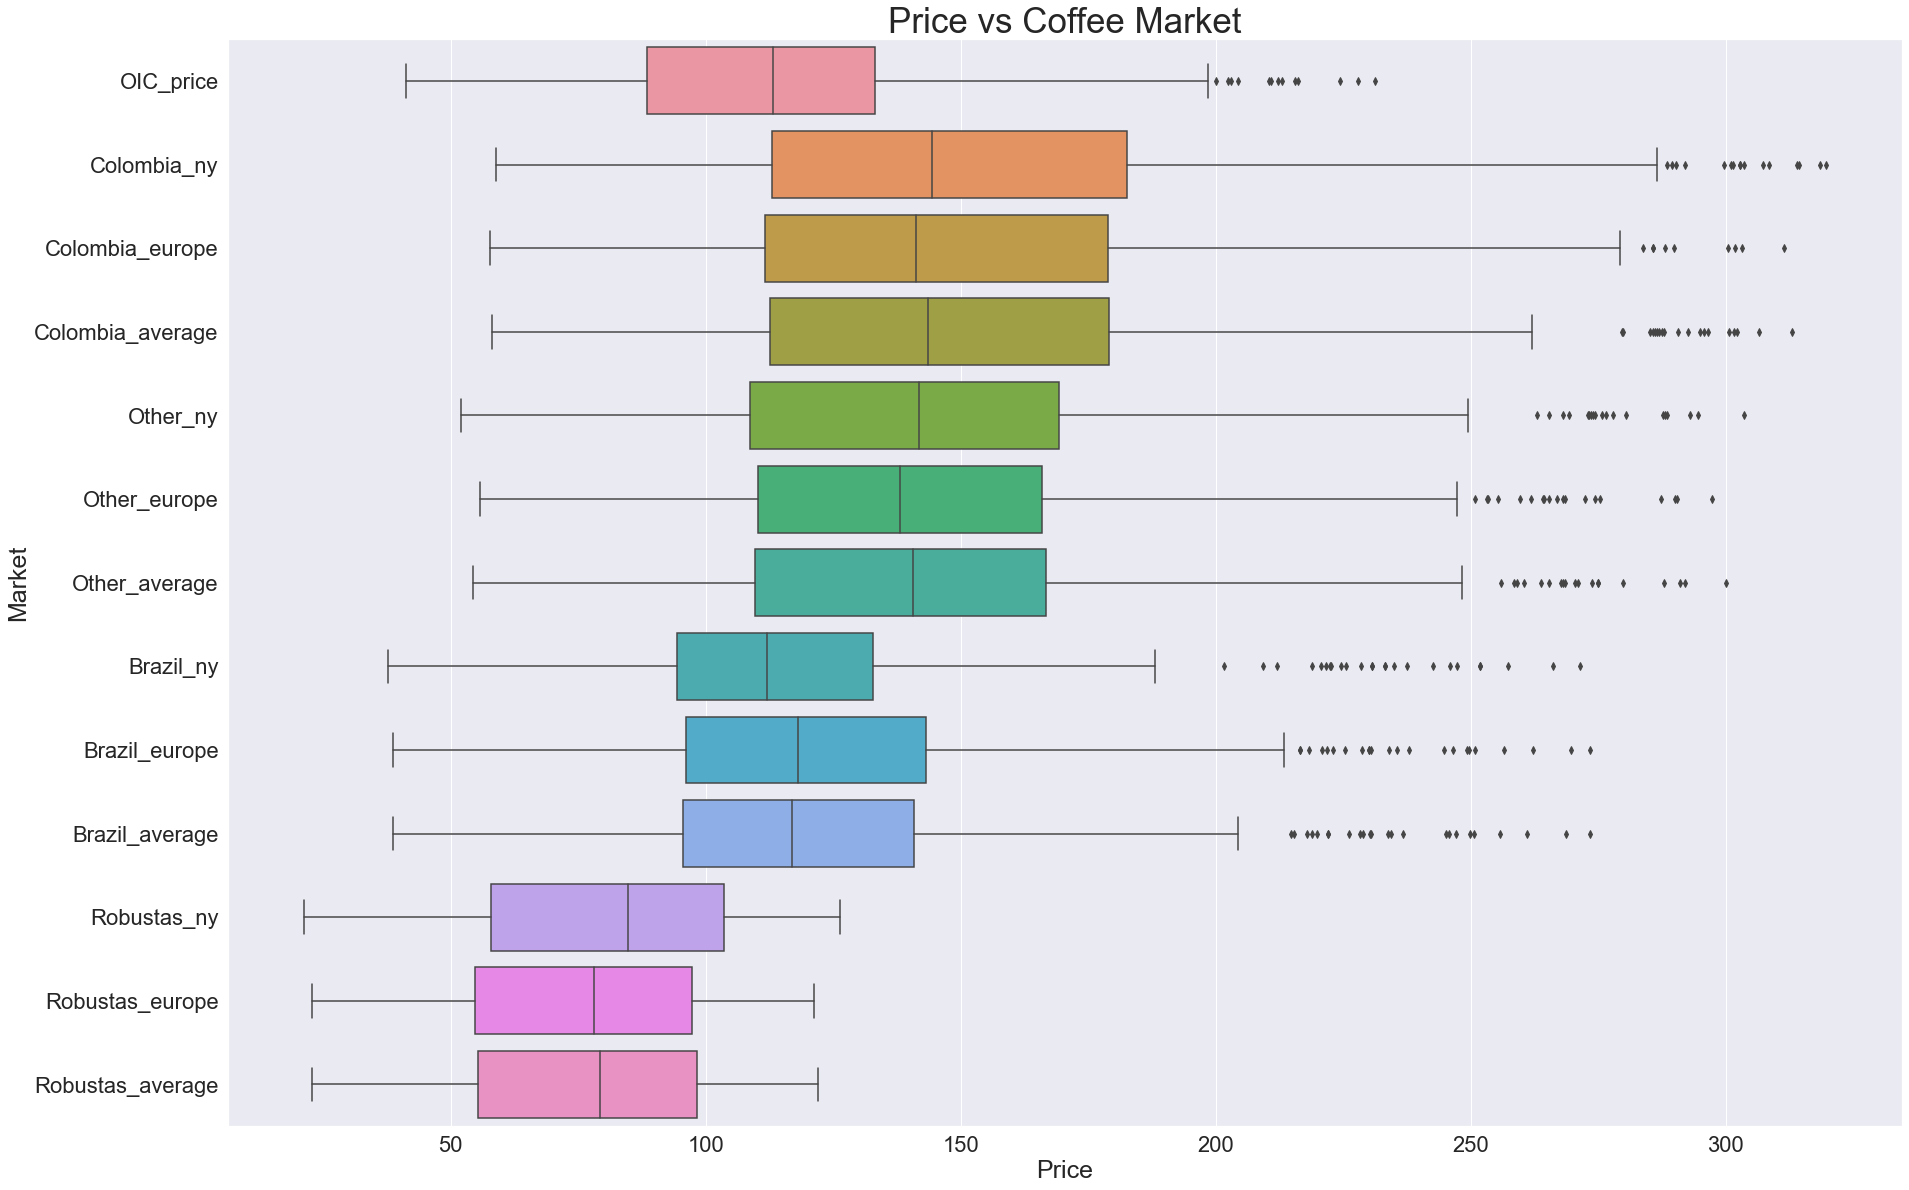

In [14]:
# incresesthe size of the graph
plt.figure(figsize=(30,20))

# increases the size of the font
sns.set(font_scale=2)

# sets the data and the orientation
s = sns.boxplot(data = eda, orient = 'h')

# label in x and the size of it
s.set_xlabel('Price', fontsize = 25)

# label in y and the size of it
s.set_ylabel('Market', fontsize = 25)

# title and its size
s.set_title('Price vs Coffee Market', fontsize = 35)

# show the graph!
plt.show();

The median of OIC_price is basically where the lower quartile Q1 of all “Colombian” columns start as well as the “Other” columns

The median of “Robustas” columns is smaller than the lower quartile Q1 of OIC_price column

The upper quartile or Q3 of “Robustas” is smaller than the lower quartile Q1 of all the columns with the exception of OIC_price and “Robustas_ny”

Brazil_ny has a small IQR, while all “Colombia” columns have a big IQR

The type of coffe Robustas, has the lowest prices, while Colombian Coffee has the highest prices and the 25% of Colombian Coffee price is basically the median of the OIC Price 


Graphing all columns, as a time series, to compare all of them together

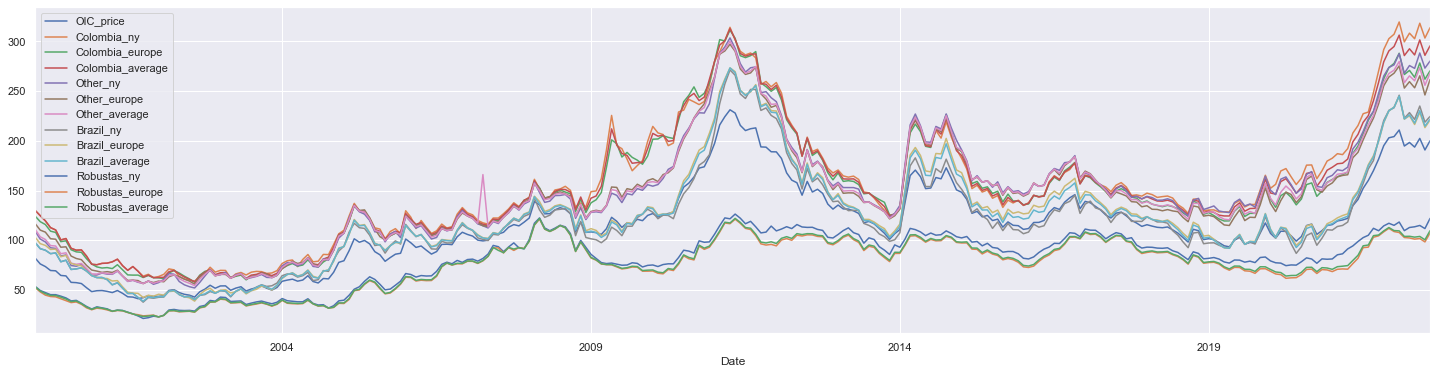

In [15]:
# create a list with th enames of the columns
lista = list(eda.columns)
#  removes the first item of the list, which is 'Date'
lista.pop(0)

# increases the size of the font
sns.set(font_scale=1)
# selects the size of the column
plt.figure(figsize=(25,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista:
    eda.plot(x ='Date', y = column, ax = ax)
    
#plt.savefig('Time vs price all.svg')

The date column is on a monthly basis for a period of 10 years and behaves as a queue, where it has a front and rear end every time a new month is added to the end of the queue, the month on the front is withdrawn from the queue.

On the Graph distribution between the averages over time can be seen that there some coffees reached up to $300 dollars twice during the decade and had lots of peaks, while the robustas had a more flat-like behavior.

Comparing just the averages and the OIC prices

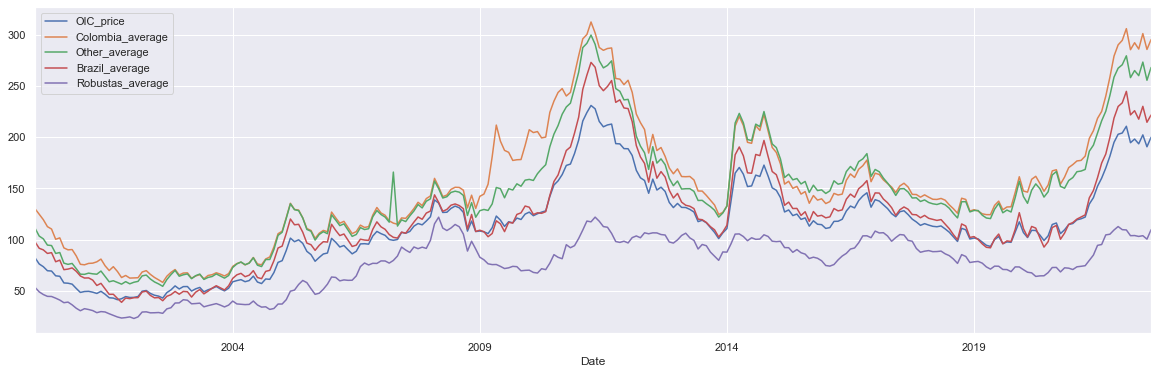

In [16]:
lista_averages = ['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']
# selects the size of the column
plt.figure(figsize=(20,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista_averages:
    eda.plot(x ='Date', y = column, ax = ax)
    
#plt.savefig('Time vs price averages.svg')

In [17]:
#'OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average'
eda_subset = eda.drop(['Date'], axis = 1)

In [18]:
# counts the number of outliers per column
def IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    x = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print(f'Number of outliers {str(len(x))}')
    print(f'max outlier {x.max()}, min outlier {x.min()}')

for i in eda_subset:
    print('\n',i)
    print(IQR(eda_subset[i]))


 OIC_price
Number of outliers 13
max outlier 231.24, min outlier 200.11
None

 Colombia_ny
Number of outliers 16
max outlier 319.63375, min outlier 288.43
None

 Colombia_europe
Number of outliers 9
max outlier 311.45, min outlier 283.74
None

 Colombia_average
Number of outliers 19
max outlier 312.95, min outlier 279.55681818181813
None

 Other_ny
Number of outliers 19
max outlier 303.59, min outlier 262.94
None

 Other_europe
Number of outliers 19
max outlier 297.22, min outlier 250.75
None

 Other_average
Number of outliers 19
max outlier 300.12, min outlier 255.90657034106954
None

 Brazil_ny
Number of outliers 25
max outlier 271.39, min outlier 201.60674603174598
None

 Brazil_europe
Number of outliers 23
max outlier 273.43, min outlier 216.46838264311285
None

 Brazil_average
Number of outliers 24
max outlier 273.4, min outlier 214.80402869732916
None

 Robustas_ny
Number of outliers 0
max outlier nan, min outlier nan
None

 Robustas_europe
Number of outliers 0
max outlier nan, 

There are no outliers in the Robustas columns, but the other columns do have outliers

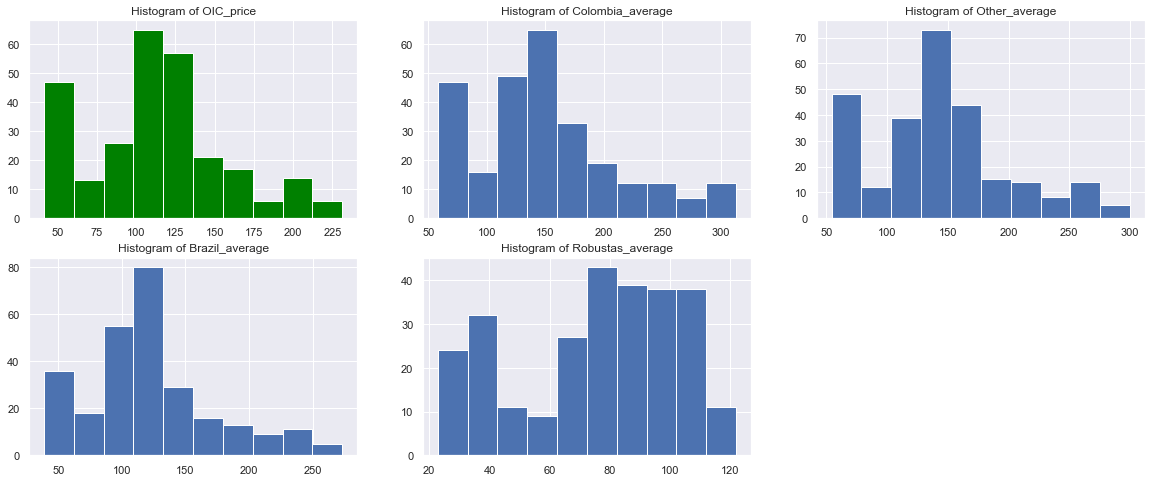

In [19]:
# plotting just the average columns and the OIC_price
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.hist(eda['OIC_price'], color = 'green')
plt.title('Histogram of OIC_price')

plt.subplot(2,3,2)
plt.hist(eda['Colombia_average'])
plt.title('Histogram of Colombia_average')

plt.subplot(2,3,3)
plt.hist(eda['Other_average'])
plt.title('Histogram of Other_average')

plt.subplot(2,3,4)
plt.hist(eda['Brazil_average'])
plt.title('Histogram of Brazil_average')

plt.subplot(2,3,5)
plt.hist(eda['Robustas_average'])
plt.title('Histogram of Robustas_average');

#plt.savefig('hist averages.svg')

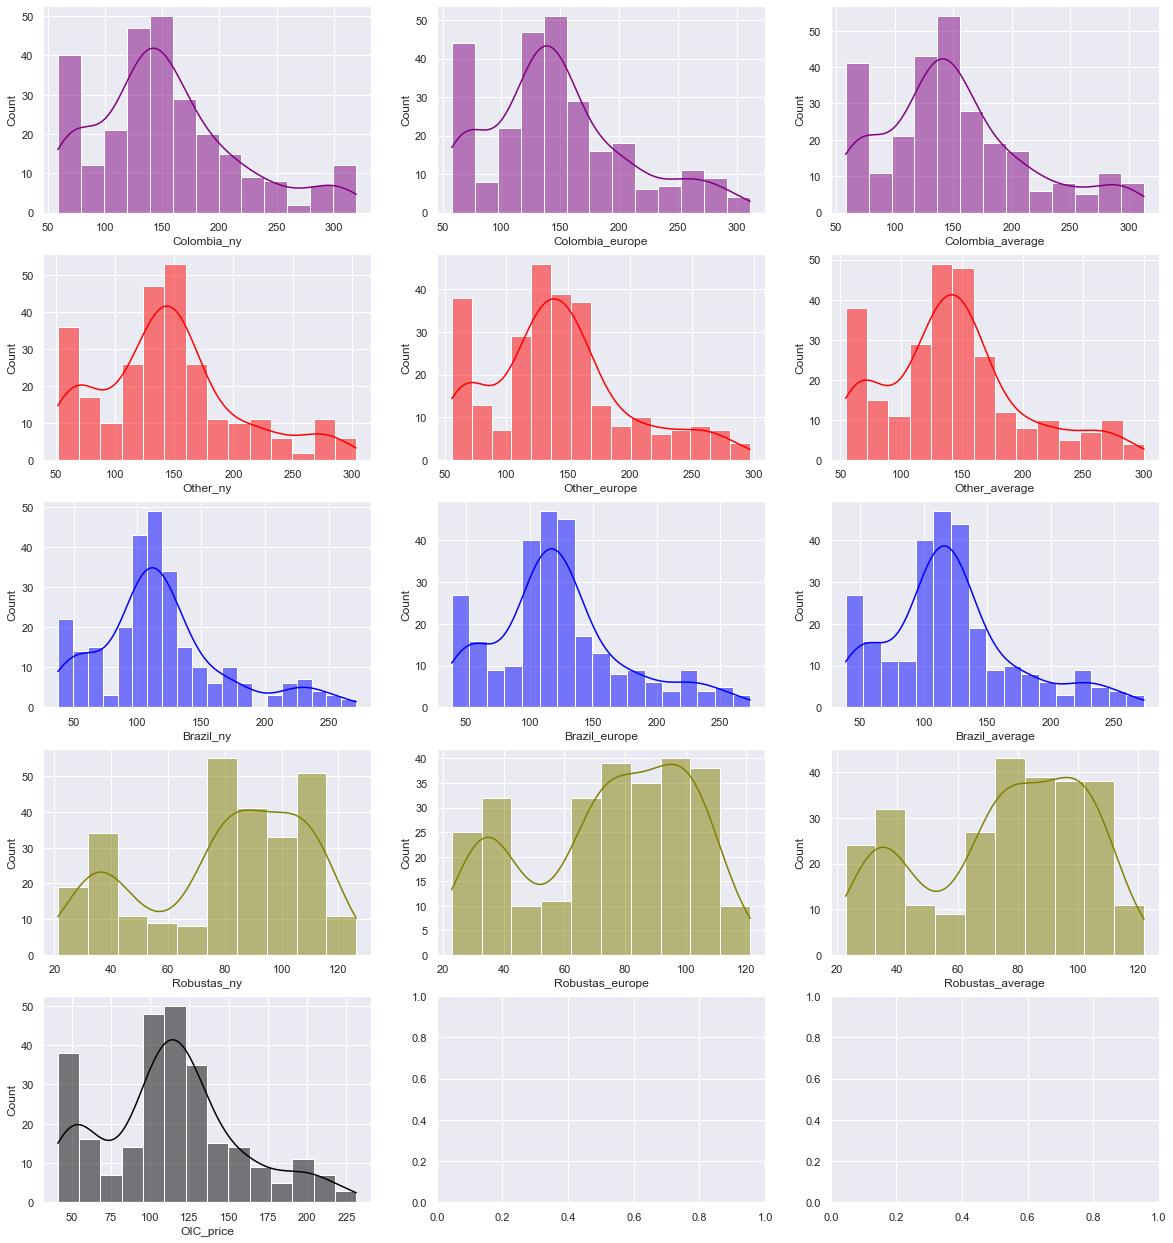

In [20]:
fig, axes = plt.subplots(5,3, figsize = (20,22))
sns.histplot(eda_subset['Colombia_ny'], kde = True, ax = axes[0,0], color = 'purple')
sns.histplot(eda_subset['Colombia_europe'], kde = True, ax = axes[0,1], color = 'purple')
sns.histplot(eda_subset['Colombia_average'], kde = True, ax = axes[0,2], color = 'purple')

sns.histplot(eda_subset['Other_ny'], kde = True, ax = axes[1,0], color = 'red')
sns.histplot(eda_subset['Other_europe'], kde = True, ax = axes[1,1], color = 'red')
sns.histplot(eda_subset['Other_average'], kde = True, ax = axes[1,2], color = 'red')

sns.histplot(eda_subset['Brazil_ny'], kde = True, ax = axes[2,0], color = 'blue')
sns.histplot(eda_subset['Brazil_europe'], kde = True, ax = axes[2,1], color = 'blue')
sns.histplot(eda_subset['Brazil_average'], kde = True, ax = axes[2,2], color = 'blue')

sns.histplot(eda_subset['Robustas_ny'], kde = True, ax = axes[3,0], color = 'olive')
sns.histplot(eda_subset['Robustas_europe'], kde = True, ax = axes[3,1], color = 'olive')
sns.histplot(eda_subset['Robustas_average'], kde = True, ax = axes[3,2], color = 'olive')

sns.histplot(eda_subset['OIC_price'], kde = True, ax = axes[4, 0], color = 'black')
plt.show()

All columns follow almost the same distribution pattern, however, Robustas_average is quite different from the others, and the data is not that “normally distributed”. Please note that Robustas type coffee follows a different distribution that looks like a bimodal distribution, it has two local maxima points that are notable in the graph.

The variable OIC_price, here in color black, follows almost the same distribution of all the other columns, with a slight peak at around US $55 dollars.


In [21]:
# grouping by the year and checking the average price every year
eda.groupby(eda['Date'].dt.year).mean()
#df_styled = eda.groupby(eda['Date'].dt.year).mean().style.background_gradient()
#dfi.export(df_styled, "avg per year.svg")

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
Date,,,,,,,,,,,,,
2000,64.245000,102.600833,99.801667,102.603333,85.094167,92.889167,87.075000,79.861667,83.666667,79.862500,42.118333,40.358333,41.413333
2001,45.591667,72.205000,68.235833,72.050833,61.937500,63.139167,62.283333,50.523333,52.415000,50.699167,27.300833,27.485833,27.540833
2002,47.755000,65.265000,64.780833,64.901667,60.439167,62.345833,61.554167,45.103333,45.920000,45.234167,30.835000,29.776667,30.027500
2003,51.896667,67.305000,64.336667,65.329167,64.088333,64.301667,64.199167,50.820000,50.158333,50.314167,38.391667,36.495833,36.944167
2004,62.150833,83.850833,79.492500,81.438333,80.145000,80.643333,80.466667,68.175833,69.110000,68.968333,37.279167,35.657500,35.978333
2005,89.344167,117.000000,114.670833,115.730833,114.292500,114.826667,114.830833,101.329167,102.485000,102.290000,53.375833,49.859167,50.505000
2006,95.745000,117.915000,115.704167,116.804167,113.950833,114.795833,114.400833,102.878333,104.186667,103.920833,70.282500,66.982500,67.558333
2007,107.679167,126.740833,124.703333,125.570000,123.163333,123.808333,127.832500,110.689167,112.064167,111.791667,88.263333,86.295000,86.371667
2008,125.465787,146.076027,144.266040,145.371284,139.630237,141.985913,141.213821,124.471924,129.475855,128.350946,107.656345,106.318875,106.561649


Note,  that “the daily price increased by over 50% between 30 January and 10 March, as the ongoing drought in Brazil and uncertainty over the 2014/15 crop put upward pressure on prices” (ICO.ORG, 2014), this is particularly important due that January 2014 was one of the hottest months in “Brazil, which produces nearly 40% of the world’s coffee” (Wile, 2014),  and lots of the crops were lost on this year

In [22]:
# 2011 has been the higest price for coffee for 'OIC_price', even 10 years after today!
avg_year = eda.groupby(eda['Date'].dt.year)['OIC_price'].mean()
avg_year.agg(['min','max'])

min     45.591667
max    210.389167
Name: OIC_price, dtype: float64

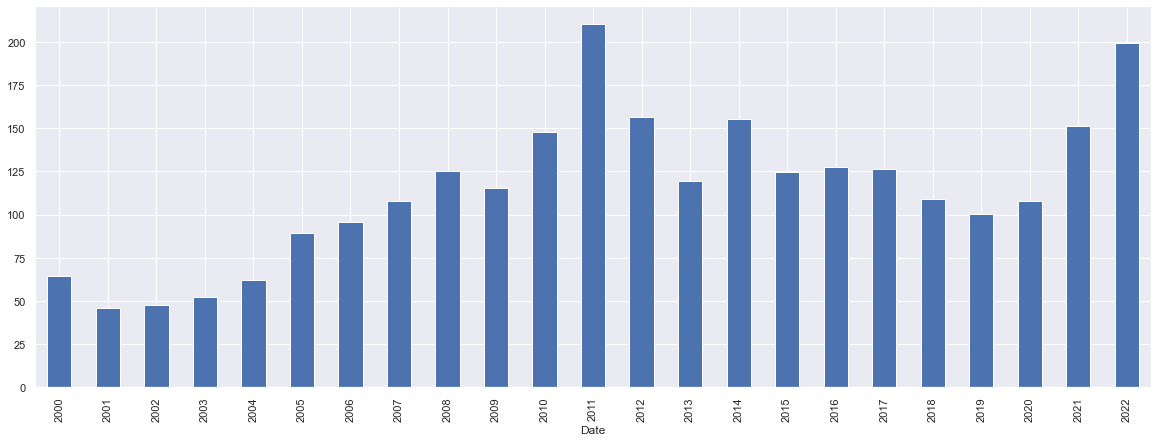

In [23]:
# ploting the Average per year
avg_year.plot( kind = 'bar', figsize = (20,7));
#plt.savefig('avg_year.svg')

Plotting the average price per year as a distribution graph, shows the Average Maximum Price of OIC has been US 210.38 in the year 2011, while the Average Minimum Price of IC has been US 45.59 in the year 2001. 

In [24]:
# Months of February and March are when the coffe has the highest prices, not a significant increase in price with only 3%
avg_month = eda.groupby(eda['Date'].dt.month_name())['OIC_price'].mean()
avg_month.agg(['min','max'])

min    111.489454
max    115.209163
Name: OIC_price, dtype: float64

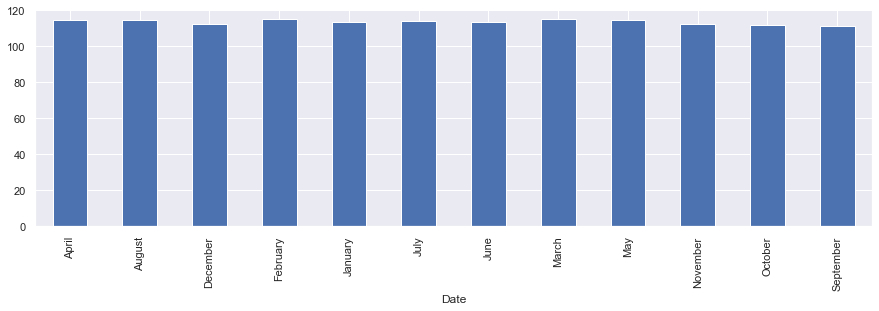

In [25]:
# ploting the average each month
avg_month.plot( kind = 'bar', figsize = (15,4));

The months of February and March, are when the coffee has the highest prices, however, there is not a significant increase in price, only 3%

Minimum  Month price: 111.48

Maximum Month price: 115.20


# Start of Machine Learning Regression Algorithms with train_test_split()

In [26]:
# creates a copy of the original dataframe
test = df.copy()

# saves the column 'Date' as date  and removes the column 'Date' from the new dataframe 'test'
date = test['Date']
test = test.drop(['Date'], axis = 1)

test = test.astype(float) # converts everything to float

## Split the data frame intro Train (X) and Test (y)

In [27]:
import statsmodels.regression.linear_model as sm
import statsmodels.api as am

X = test.iloc[:, 1:] # All the variables but OIC_price
y = test.iloc[:, 0] # OIC_price

## Get the OLS (Ordinary Least squares) and Obtain the Model

As there are 14 columns in our data set, in order to build a proper model to do regression, there will be a limit of SL = 0.05  and obtain the p-values for each of the columns, please note that the independent column is OIC_price, and there won’t be an analysis for this column, and the same will be done with the column Date.

In order to obtain an equation that satisfies the model of multiple linear regression 

I’ll obtain the p-value, using a backward stepwise regression,  and if the p-values for the columns are  > SL, then it will be discarded.


In [28]:
X = am.add_constant(X) # adds a constant to the model and evaluates all the columns

result = am.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              OIC_price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.291e+04
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:31:03   Log-Likelihood:                -415.90
No. Observations:                 272   AIC:                             857.8
Df Residuals:                     259   BIC:                             904.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3823      0.277  

There are two columns with a high p-value, but only one will be removed in this step, in this case, the column with the constant value, which has a p-value of 0.169

In [29]:
# after removing Constant and with all the columns
X = test.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]]

result = am.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              OIC_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.556e+05
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                        0.00
Time:                        09:31:03   Log-Likelihood:                         -416.89
No. Observations:                 272   AIC:                                      857.8
Df Residuals:                     260   BIC:                                      901.1
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Then after removing the constant column, there are more columns again with different value, and once again, I’ll remove the one with the highest p-value, in this case, is column number 6 called Other_average, with a p-value of 0.118


In [30]:
# after removing #6 Other_average, and keeping the rest of the columns
X = test.iloc[:, [1,2,3,4,5,7,8,9,10,11,12]] 

result = am.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              OIC_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.773e+05
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                        0.00
Time:                        09:31:03   Log-Likelihood:                         -418.17
No. Observations:                 272   AIC:                                      858.3
Df Residuals:                     261   BIC:                                      898.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Now is the turn to remove the column Other_ny as it has a p-value = 0.06 and is above my limit of 0.05


In [31]:
# after removing #6 Other_average and #4 Other_ny, and keeping the rest of the columns
X = test.iloc[:, [1,2,3,5,7,8,9,10,11,12]] 

result = am.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              OIC_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.975e+05
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                        0.00
Time:                        09:31:03   Log-Likelihood:                         -422.09
No. Observations:                 272   AIC:                                      864.2
Df Residuals:                     262   BIC:                                      900.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

The model is completed, keeping all the columns with the exemption of Columns: Other_average and Other_ny.



# Model:

**Price_OIC** = (0.3649*Colombia_ny) + (0.4502*Colombia_europe) - (0.6882*Colombia_average) + 
(0.0506*Other_ny) + (0.2169*Other_europe) - (0.1331*Brazil_ny) - (0.7909*Brazil_europe) + (1.1895*Brazil_average) + (0.3915*Robustas_ny) + (1.9955*Robustas_europe) - (2.0558*Robustas_average)
  
  

# Start of Machine Learning Regression Algorithms with train_test_split()

## Regressions not Normalized

### Methodology
In this section, the algorithms will be run without being normalized and further ahead they will be Normalized

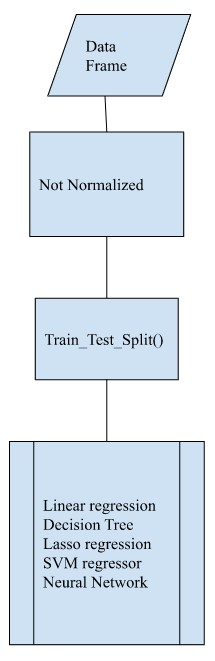

### Create X train, X test, Y train and Y test

In [32]:
from sklearn.model_selection import train_test_split

# create X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=10)

print(f'X_train: {len(X_train)} elements  |  y_train: {len(y_train)} elements')
print(f'X_test: {len(X_test)} elements    |  y_test: {len(y_test)} elements')

X_train: 190 elements  |  y_train: 190 elements
X_test: 82 elements    |  y_test: 82 elements


The sample has been divided into 30% testing and 70% training

### Linear Regression

After creating the training and testing sets with the function train_test_split(), and dividing the sets 30% for testing and 70% for training, then I proceed to do a linear regression with the function LinearRegression().

In [33]:
#importing th necesary libraries
from sklearn.linear_model import LinearRegression

# create the linear regression model
model_regression = LinearRegression()

# Start measuring the time it takes to train the model
start = time.time()

# train the model
model_regression.fit(X_train, y_train)

# finish measuring the time it takes to train the model
end = time.time()

#obtain a prediction
predicted_regression = model_regression.predict(X_test)

# total training time
lr_time = end - start
print(f'Training time: {lr_time}s')

Training time: 0.003993511199951172s


In [34]:
# checking the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# call the metrics and saves them
mae = mean_absolute_error(y_test, predicted_regression)
mse = mean_squared_error(y_test, predicted_regression)
rmse = sqrt(mse)
r2 = r2_score(y_test, predicted_regression)

# creates an empty dataframe to store the results for the metrics 
errors = pd.DataFrame()
errors['Metrics'] =['MAE', 'MSE', 'RMSE', 'r2']
errors['Linear_regression'] = [mae, mse, rmse, r2]
errors.set_index('Metrics', inplace = True) # sets the index
errors

,Linear_regression
Metrics,
MAE,0.796271
MSE,1.539164
RMSE,1.240631
r2,0.999157


In [35]:
# creates an empty dataframe to store the results
results = pd.DataFrame()
results['actual'] = y_test
results['predicted_regression'] = predicted_regression
results.head(5)

,actual,predicted_regression
180,148.240000,148.860768
24,43.460000,40.463793
183,129.020000,130.173654
214,117.262273,117.481253
56,61.470000,61.697512


In [36]:
coeff = model_regression.coef_.tolist() # converts the array of coeficients to list
coefficients = pd.DataFrame() # creates an empty dataframe
coefficients['Variable'] = X.columns.tolist() # puts the names of the columns as a list and then as a rows
coefficients['Coefficient'] = coeff # creates a dataframe with the coeficients 
coefficients.set_index('Variable') # sets the index

,Coefficient
Variable,
Colombia_ny,0.387995
Colombia_europe,0.458673
Colombia_average,-0.722548
Other_europe,0.266651
Brazil_ny,-0.178374
Brazil_europe,-0.981275
Brazil_average,1.428200
Robustas_ny,0.365205
Robustas_europe,1.621685


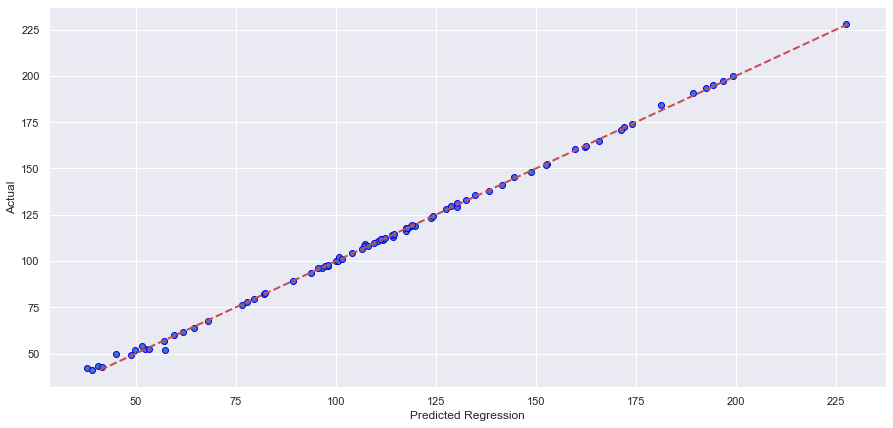

In [37]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_regression, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Regression')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

The results of the metrics and the plot of Actual vs predicted results, shows that the model fits properly.

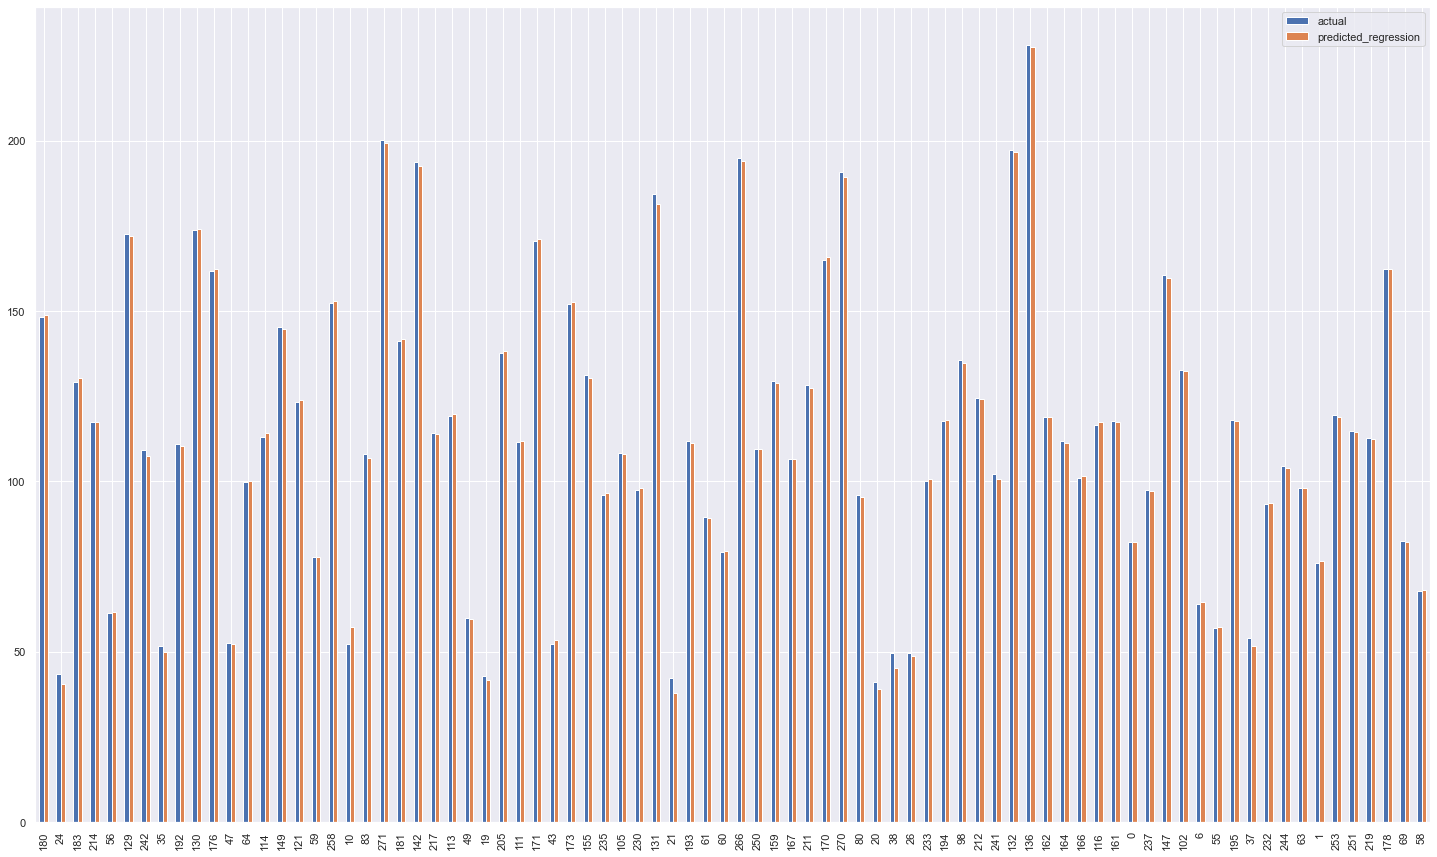

In [38]:
# Plotting Actual price vs predicted price
results.plot(kind='bar',figsize=(25,15))
plt.show()

In [39]:
#df_pred = pd.DataFrame({'actuals': y_test,'predictions': predicted_regression })

### Decision Tree Regressor

Another Algorithm that has been studied is the Decision Tree Regressor, here we have the following metrics and they are being compared with the previous algorithm

In [40]:
# import the necesary libraries
from sklearn.tree import DecisionTreeRegressor

# create the model
model_tree = DecisionTreeRegressor(random_state=10)

# Start measuring the time it takes to train the model
start = time.time()

# train the model
model_tree.fit(X_train, y_train)

# finish measuring the time it takes to train the model
end = time.time()

# total training time
dt_time = end - start
print(f'Training time: {dt_time}s')

# obtain the prediction
predicted_tree = model_tree.predict(X_test)

Training time: 0.0019981861114501953s


In [41]:
# calls the metrics and saves them
mae = mean_absolute_error(y_test, predicted_tree)
mse = mean_squared_error(y_test, predicted_tree)
rmse = sqrt(mse)
r2 = r2_score(y_test, predicted_tree)

# dataframe to store the results for the metrics 
errors['Regression_Tree'] = [mae, mse, rmse, r2]
errors

,Linear_regression,Regression_Tree
Metrics,,
MAE,0.796271,3.144109
MSE,1.539164,22.463621
RMSE,1.240631,4.739580
r2,0.999157,0.987702


In [42]:
# adds the results to the recently created dataframe 
results['predicted_tree'] = predicted_tree
results.head(5)

,actual,predicted_regression,predicted_tree
180,148.240000,148.860768,151.28
24,43.460000,40.463793,44.30
183,129.020000,130.173654,131.51
214,117.262273,117.481253,120.01
56,61.470000,61.697512,61.10


In [43]:
# # creates a linear regression decision tree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,8))#, dpi=100)
# plot_tree(model_tree, feature_names=X.columns, fontsize = 12);

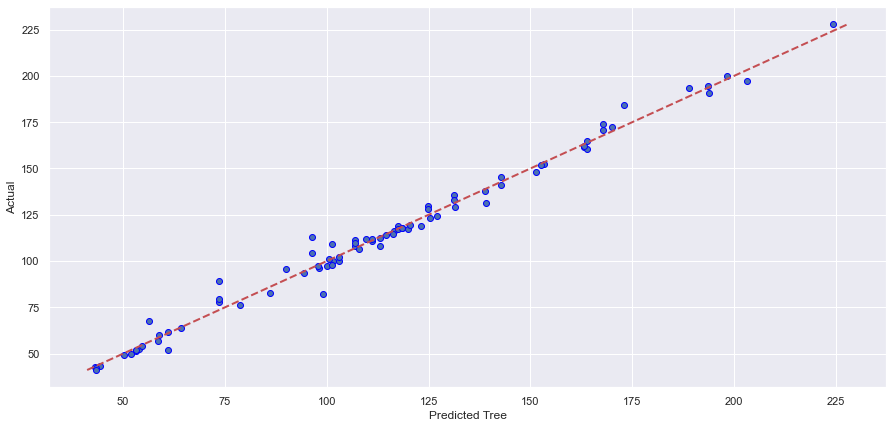

In [44]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_tree, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Tree')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

Can be seen that the metrics are worse than the Linear regression, having a RMSE very high when compared to the other one. 

The graph shows what we are talking about as we can see that some of the points are not that much following the line of the graph.

### LASSO Regressor (Least Absolute Shrinkage and SelectionOperator)

Another algorithm to evaluate our model is LASSO, and after evaluation of the model, the following is given and compared with the previous ones

In [45]:
# import the necesary libraries
from sklearn.linear_model import Lasso

# creates the model
#lasso_regressor = Lasso(fit_intercept=False)
alpha = 0.1 # for normalized
beta = 1 # for not normalized
lasso_regressor = Lasso(beta)

# Start measuring the time it takes to train the model
start = time.time()

# train the model
lasso_regressor.fit(X_train, y_train)

# finish measuring the time it takes to train the model
end = time.time()

# total training time
lasso_time = end - start
print(f'Training time: {lasso_time}s')

# obtain the predictions
predicted_lasso = lasso_regressor.predict(X_test)

Training time: 0.00536346435546875s


In [46]:
mae = mean_absolute_error(y_test, predicted_lasso)
mse = mean_squared_error(y_test, predicted_lasso)
rmse = sqrt(mse)
r2 = r2_score(y_test, predicted_lasso)

# dataframe to store the results for the metrics 
errors['Regression_Lasso'] = [mae, mse, rmse, r2]
errors

,Linear_regression,Regression_Tree,Regression_Lasso
Metrics,,,
MAE,0.796271,3.144109,1.208602
MSE,1.539164,22.463621,3.646354
RMSE,1.240631,4.739580,1.909543
r2,0.999157,0.987702,0.998004


In [47]:
results['predicted_lasso'] = predicted_lasso
results.head(5)

,actual,predicted_regression,predicted_tree,predicted_lasso
180,148.240000,148.860768,151.28,148.874913
24,43.460000,40.463793,44.30,40.909175
183,129.020000,130.173654,131.51,130.039407
214,117.262273,117.481253,120.01,117.874111
56,61.470000,61.697512,61.10,59.593575


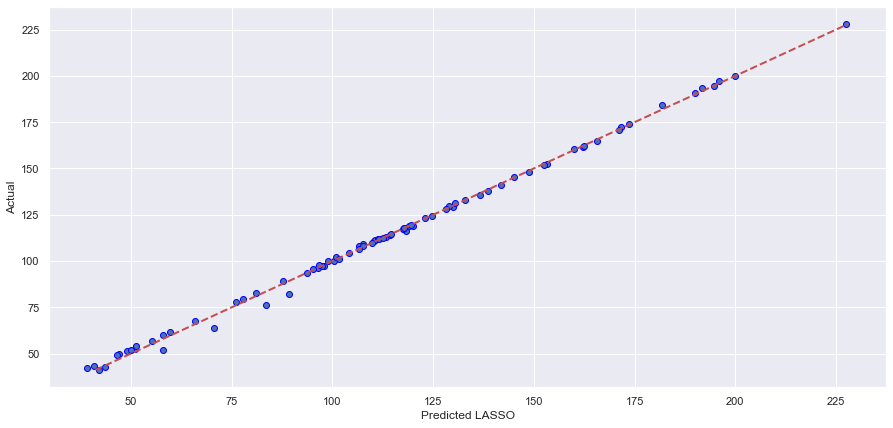

In [48]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_lasso, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted LASSO')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

When plotting the graph can be seen graphically that fits better than the Decision tree and this is confirmed by the metrics above having a better RMSE than the Decision tree but being still worse than the Linear Regression.

### SVM Support Vector Machine Regressor

The last of the algorithms being evaluated, looking at the metrics can be seen that has an awful MSE and therefore give us a very bad RMSE.

In [49]:
# import the necesary libraries
from sklearn.svm import SVR

# creates the model
svm_regressor = SVR(kernel = 'rbf') # radial base function or gaussian

# Start measuring the time it takes to train the model
start = time.time()

# train the model
svm_regressor.fit(X_train, y_train)

# finish measuring the time it takes to train the model
end = time.time()

# total training time
svm_time = end - start
print(f'Training time: {svm_time}s')

# obtain the predictions
svm_predicted = svm_regressor.predict(X_test)

Training time: 0.0059969425201416016s


In [50]:
mae = mean_absolute_error(y_test, svm_predicted)
mse = mean_squared_error(y_test, svm_predicted)
rmse = sqrt(mse)
r2 = r2_score(y_test, svm_predicted)

# dataframe to store the results for the metrics 
errors['SVM_Regression'] = [mae, mse, rmse, r2]
errors

,Linear_regression,Regression_Tree,Regression_Lasso,SVM_Regression
Metrics,,,,
MAE,0.796271,3.144109,1.208602,12.520108
MSE,1.539164,22.463621,3.646354,456.083021
RMSE,1.240631,4.739580,1.909543,21.356100
r2,0.999157,0.987702,0.998004,0.750310


In [51]:
results['predicted_svm'] = svm_predicted
results.head(5)

,actual,predicted_regression,predicted_tree,predicted_lasso,predicted_svm
180,148.240000,148.860768,151.28,148.874913,141.317707
24,43.460000,40.463793,44.30,40.909175,74.529230
183,129.020000,130.173654,131.51,130.039407,128.234328
214,117.262273,117.481253,120.01,117.874111,118.445614
56,61.470000,61.697512,61.10,59.593575,73.338619


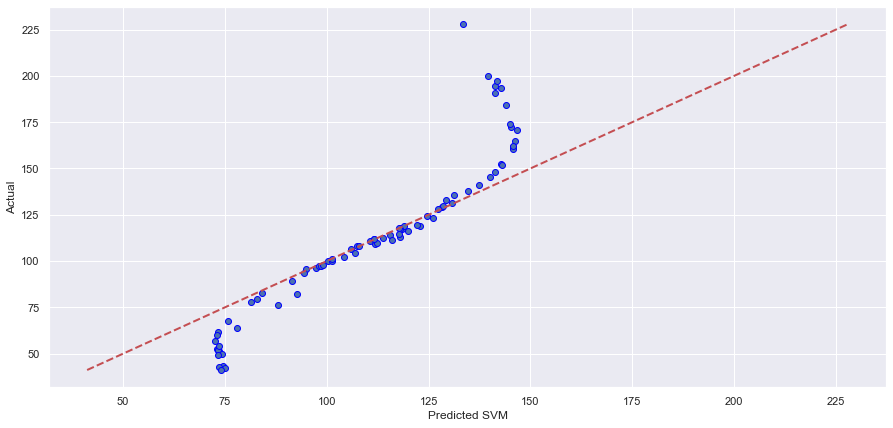

In [52]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_svm, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted SVM')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

Even the graph confirms that there is something wrong with the model as it is not fitting properly, SVM’s are sensitive to feature scales and must be normalized when used, and it will be done further ahead.

## Regressions Normalized

### Methodology
In this section, the algorithms will be run Normalized using  StandardScaler()

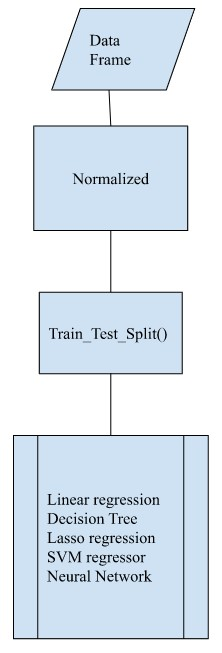

### Split the data frame intro Train (X) and Test (y)

In [53]:
# creates X and y, with All the columns for X and for y = OIC_price
X = test.iloc[:, [1,2,3,5,7,8,9,10,11,12]].values  # All the variables but OIC_price, values: to get them as numpy array
y = test.iloc[:, 0].values # OIC_price, values to get them as numpy array

### Normalize with StandarScaler()

In [54]:
# Function that applies standarization with the Standar deviation method 
from sklearn.preprocessing import StandardScaler

# normalizing with standar deviation
X_scaler = StandardScaler()
y_scaler = StandardScaler()
    
# fits and transforms the data
X = X_scaler.fit_transform(X)
y = y.reshape(-1,1) # reshape because the array has to be a 2D array or (1 column, many rows..)
y = y_scaler.fit_transform(y)   

# converting the numpy array back into dataframe
X = pd.DataFrame(X, columns = ['Colombia_ny', 'Colombia_europe', 'Colombia_average', 'Other_europe',
                               'Brazil_ny', 'Brazil_europe', 'Brazil_average', 'Robustas_ny', 'Robustas_europe',
                               'Robustas_average'])

y = np.squeeze(y) # turns the from 2 dimensions to 1 dimension

### Create X train, X test, Y train and Y test

In [55]:
from sklearn.model_selection import train_test_split

# create X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

print(f'X_train: {len(X_train)} elements  |  y_train: {len(y_train)} elements')
print(f'X_test: {len(X_test)} elements    |  y_test: {len(y_test)} elements')

X_train: 190 elements  |  y_train: 190 elements
X_test: 82 elements    |  y_test: 82 elements


### Linear Regression Normalized

Now let’s apply the same algorithms to the model but this time normalizing as it was done at the Normalization stage. 

The same data has been split in 30% for testing and 70% for training, the models give us the following metrics and are still compared with the previous algorithms already seen.

In [56]:
#importing th necesary libraries
from sklearn.linear_model import LinearRegression

# create the linear regression model
model_regression = LinearRegression()

# Start measuring the time it takes to train the model
start = time.time()

# train the model
model_regression.fit(X_train, y_train)

# finish measuring the time it takes to train the model
end = time.time()

# total training time
lrn_time = end - start
print(f'Training time: {lrn_time}s')

#obtain a prediction
predicted_regression_norm = model_regression.predict(X_test)

Training time: 0.0029993057250976562s


In [57]:
# calls the metrics and saves them
mae = mean_absolute_error(y_test, predicted_regression_norm)
mse = mean_squared_error(y_test, predicted_regression_norm)
rmse = sqrt(mse)
r2 = r2_score(y_test, predicted_regression_norm)

# dataframe to store the results for the metrics 
errors['Linear_Regression_Norm'] = [mae, mse, rmse, r2]
errors

,Linear_regression,Regression_Tree,Regression_Lasso,SVM_Regression,Linear_Regression_Norm
Metrics,,,,,
MAE,0.796271,3.144109,1.208602,12.520108,0.018260
MSE,1.539164,22.463621,3.646354,456.083021,0.000809
RMSE,1.240631,4.739580,1.909543,21.356100,0.028450
r2,0.999157,0.987702,0.998004,0.750310,0.999157


In [58]:
results['actual_norm'] = y_test
results['predicted_regression_norm'] = predicted_regression_norm
results.head()

,actual,predicted_regression,predicted_tree,predicted_lasso,predicted_svm,actual_norm,predicted_regression_norm
180,148.240000,148.860768,151.28,148.874913,141.317707,0.793596,0.807831
24,43.460000,40.463793,44.30,40.909175,74.529230,-1.609199,-1.677907
183,129.020000,130.173654,131.51,130.039407,128.234328,0.352846,0.379302
214,117.262273,117.481253,120.01,117.874111,118.445614,0.083220,0.088242
56,61.470000,61.697512,61.10,59.593575,73.338619,-1.196197,-1.190980


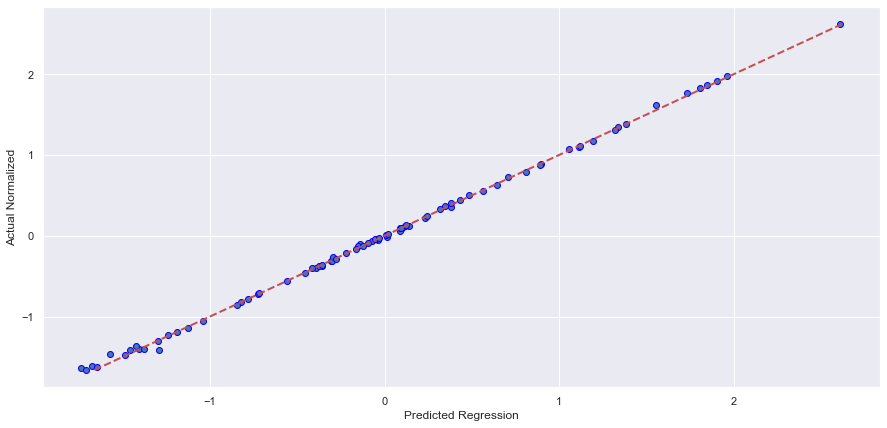

In [59]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_regression_norm, results.actual_norm, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual_norm.min(), results.actual_norm.max()], [results.actual_norm.min(), results.actual_norm.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Regression')

# set label in Y
ax.set_ylabel('Actual Normalized')

# to show the plot
plt.show()

Note that the metrics tend towards zero, meaning a much better performance than the algorithms not normalized and is confirmed graphically

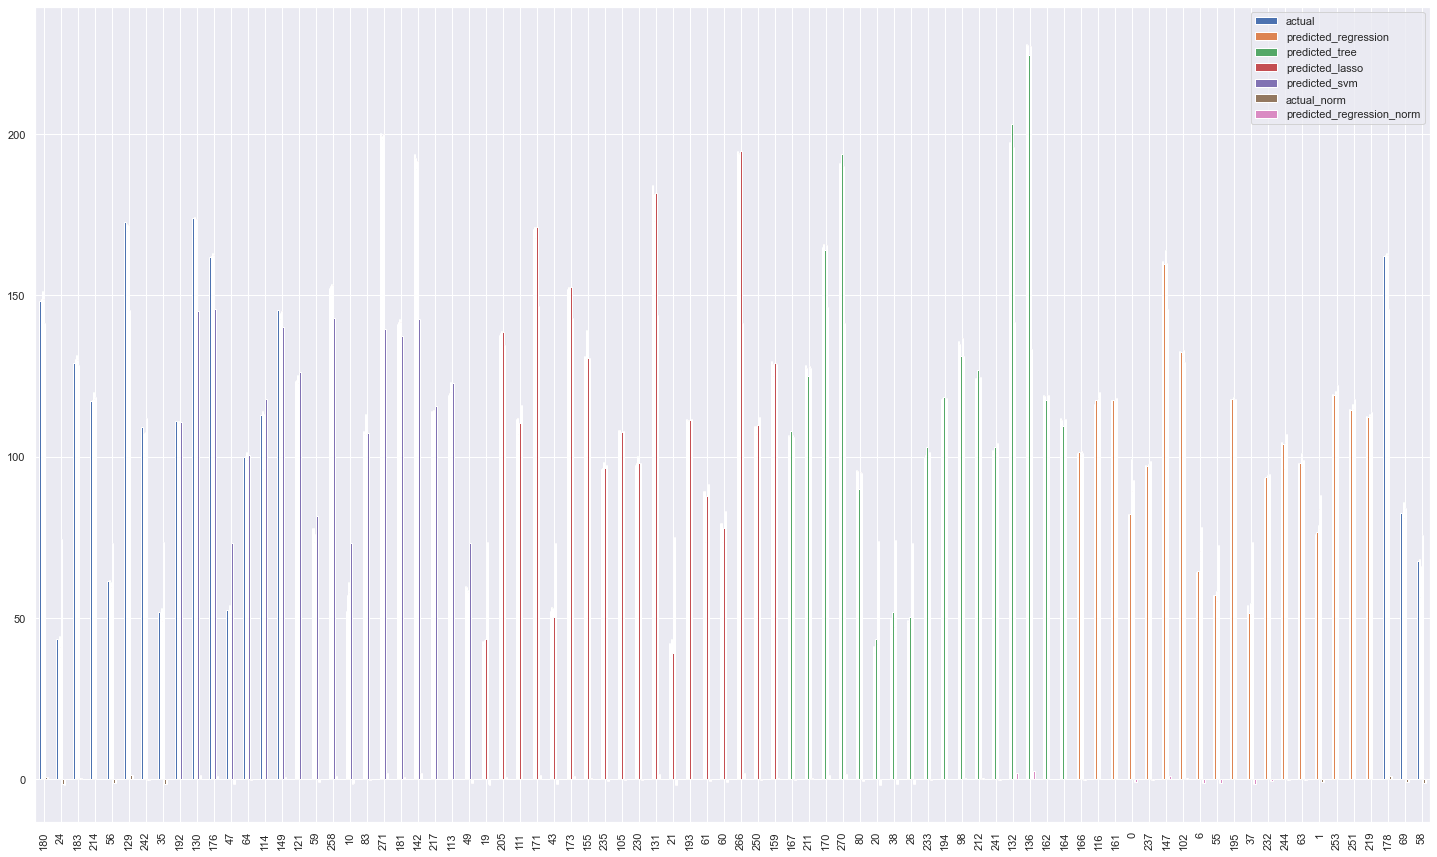

In [60]:
# Plotting Actual price vs predicted price
results.plot(kind='bar',figsize=(25,15))
plt.show()

### Decision Tree Regressor Normalized

The decision Tree regressor is analyzed in the same way as before but it has been already normalized, here we have the metrics

In [61]:
# import the necesary libraries
from sklearn.tree import DecisionTreeRegressor

# create the model
model_tree = DecisionTreeRegressor(random_state=10)

# Start measuring the time it takes to train the model
start = time.time()

# train the model
model_tree.fit(X_train, y_train)

# finish measuring the time it takes to train the model
end = time.time()

# total training time
dtn_time = end - start
print(f'Training time: {dtn_time}s')

# obtain the prediction
predicted_tree_norm = model_tree.predict(X_test)

Training time: 0.0020074844360351562s


In [62]:
# calls the metrics and saves them
mae = mean_absolute_error(y_test, predicted_tree_norm)
mse = mean_squared_error(y_test, predicted_tree_norm)
rmse = sqrt(mse)
r2 = r2_score(y_test, predicted_tree_norm)

# dataframe to store the results for the metrics 
errors['Regression_Tree_Norm'] = [mae, mse, rmse, r2]
errors

,Linear_regression,Regression_Tree,Regression_Lasso,SVM_Regression,Linear_Regression_Norm,Regression_Tree_Norm
Metrics,,,,,,
MAE,0.796271,3.144109,1.208602,12.520108,0.018260,0.076258
MSE,1.539164,22.463621,3.646354,456.083021,0.000809,0.013131
RMSE,1.240631,4.739580,1.909543,21.356100,0.028450,0.114592
r2,0.999157,0.987702,0.998004,0.750310,0.999157,0.986329


In [63]:
# adds the results to the recently created dataframe 
results['predicted_tree_norm'] = predicted_tree_norm
results.head(5)

,actual,predicted_regression,predicted_tree,predicted_lasso,predicted_svm,actual_norm,predicted_regression_norm,predicted_tree_norm
180,148.240000,148.860768,151.28,148.874913,141.317707,0.793596,0.807831,0.863308
24,43.460000,40.463793,44.30,40.909175,74.529230,-1.609199,-1.677907,-1.589936
183,129.020000,130.173654,131.51,130.039407,128.234328,0.352846,0.379302,0.409946
214,117.262273,117.481253,120.01,117.874111,118.445614,0.083220,0.088242,0.102184
56,61.470000,61.697512,61.10,59.593575,73.338619,-1.196197,-1.190980,-1.204682


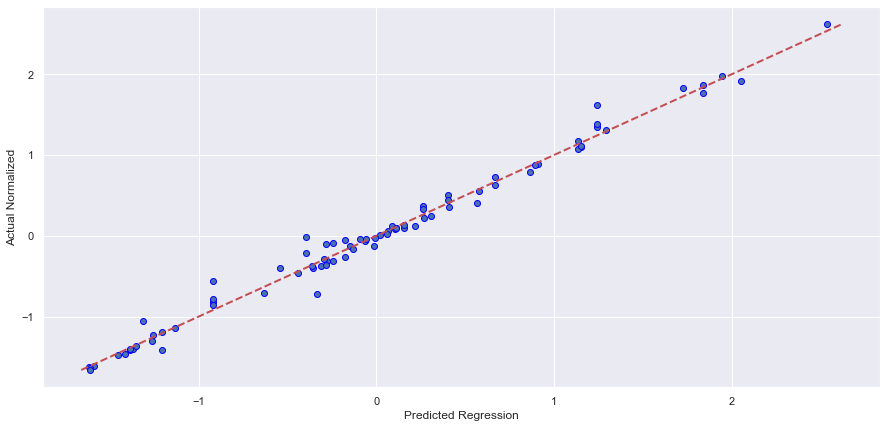

In [64]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_tree_norm, results.actual_norm, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual_norm.min(), results.actual_norm.max()], [results.actual_norm.min(), results.actual_norm.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Regression')

# set label in Y
ax.set_ylabel('Actual Normalized')

# to show the plot
plt.show()

Is a good predictor when compared with the Not Normalized one, but is still not that good when seen comparing the RMSE of linear regression Normalized, and can be seen on the graph.

### LASSO Regressor (Least Absolute Shrinkage and SelectionOperator) Normalized

The model Lasso once it has been normalized produces the following metrics, being this metrics much better than the Lasso Not Normalized, as the RMSE has been decreased by a lot and then I proceed with the graph

In [65]:
# import the necesary libraries
from sklearn.linear_model import Lasso

# creates the model, alpha = 0, then the lasso regression line will be the same as the least square lines, and as it gests
# smaller, until the slope is 0 
# lasso is the sum of the quared residuals + alpha x |the slope|
lasso_regressor = Lasso(alpha)

# Start measuring the time it takes to train the model
start = time.time()

# train the model
lasso_regressor.fit(X_train, y_train)

# finish measuring the time it takes to train the model
end = time.time()

# total training time
lasson_time = end - start
print(f'Training time: {lasson_time}s')

# obtain the predictions
predicted_lasso_norm = lasso_regressor.predict(X_test)


Training time: 0.003996849060058594s


In [66]:
mae = mean_absolute_error(y_test, predicted_lasso_norm)
mse = mean_squared_error(y_test, predicted_lasso_norm)
rmse = sqrt(mse)
r2 = r2_score(y_test, predicted_lasso_norm)

# dataframe to store the results for the metrics 
errors['Regression_Lasso_Norm'] = [mae, mse, rmse, r2]
errors

,Linear_regression,Regression_Tree,Regression_Lasso,SVM_Regression,Linear_Regression_Norm,Regression_Tree_Norm,Regression_Lasso_Norm
Metrics,,,,,,,
MAE,0.796271,3.144109,1.208602,12.520108,0.018260,0.076258,0.086498
MSE,1.539164,22.463621,3.646354,456.083021,0.000809,0.013131,0.012066
RMSE,1.240631,4.739580,1.909543,21.356100,0.028450,0.114592,0.109843
r2,0.999157,0.987702,0.998004,0.750310,0.999157,0.986329,0.987439


In [67]:
results['predicted_lasso_norm'] = predicted_lasso_norm
results.head(5)

,actual,predicted_regression,predicted_tree,predicted_lasso,predicted_svm,actual_norm,predicted_regression_norm,predicted_tree_norm,predicted_lasso_norm
180,148.240000,148.860768,151.28,148.874913,141.317707,0.793596,0.807831,0.863308,0.740549
24,43.460000,40.463793,44.30,40.909175,74.529230,-1.609199,-1.677907,-1.589936,-1.479670
183,129.020000,130.173654,131.51,130.039407,128.234328,0.352846,0.379302,0.409946,0.334779
214,117.262273,117.481253,120.01,117.874111,118.445614,0.083220,0.088242,0.102184,0.073195
56,61.470000,61.697512,61.10,59.593575,73.338619,-1.196197,-1.190980,-1.204682,-1.083827


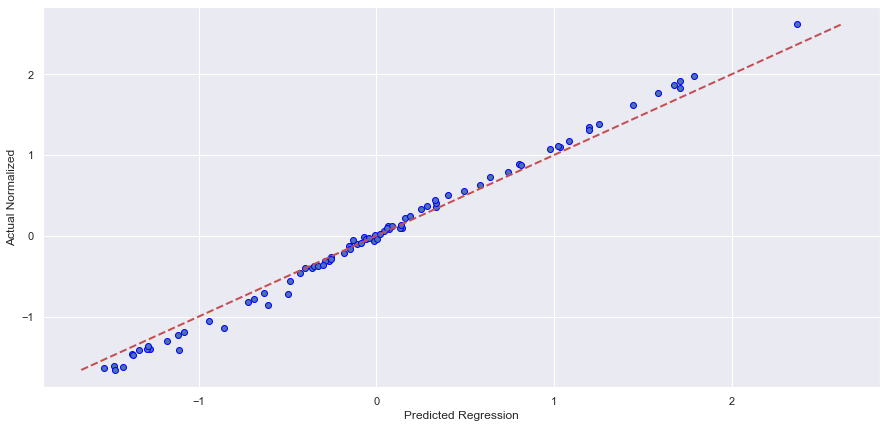

In [68]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_lasso_norm, results.actual_norm, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual_norm.min(), results.actual_norm.max()], [results.actual_norm.min(), results.actual_norm.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Regression')

# set label in Y
ax.set_ylabel('Actual Normalized')

# to show the plot
plt.show()

### SVM Support Vector Machine Regressor Normalized

The last of the algorithms being evaluated, Can be seen as quite a change; it went from 21.36 to 0.07 in the RMSE metric, after being normalized

In [69]:
# import the necesary libraries
from sklearn.svm import SVR

# creates the model
svm_regressor = SVR(kernel = 'rbf') # radial base function or gaussian

# Start measuring the time it takes to train the model
start = time.time()

# train the model
svm_regressor.fit(X_train, np.ravel(y_train))

# finish measuring the time it takes to train the model
end = time.time()

# total training time
svmn_time = end - start
print(f'Training time: {svmn_time}s')

# obtain the predictions
svm_predicted_norm = svm_regressor.predict(X_test)

Training time: 0.0030031204223632812s


In [70]:
mae = mean_absolute_error(y_test, svm_predicted_norm)
mse = mean_squared_error(y_test, svm_predicted_norm)
rmse = sqrt(mse)
r2 = r2_score(y_test, svm_predicted_norm)

# dataframe to store the results for the metrics 
errors['SVM_Regression_Norm'] = [mae, mse, rmse, r2]
errors

,Linear_regression,Regression_Tree,Regression_Lasso,SVM_Regression,Linear_Regression_Norm,Regression_Tree_Norm,Regression_Lasso_Norm,SVM_Regression_Norm
Metrics,,,,,,,,
MAE,0.796271,3.144109,1.208602,12.520108,0.018260,0.076258,0.086498,0.059528
MSE,1.539164,22.463621,3.646354,456.083021,0.000809,0.013131,0.012066,0.005159
RMSE,1.240631,4.739580,1.909543,21.356100,0.028450,0.114592,0.109843,0.071826
r2,0.999157,0.987702,0.998004,0.750310,0.999157,0.986329,0.987439,0.994629


In [71]:
results['svm_predicted_norm'] = svm_predicted_norm # predicted values when normalized
results.head(5)

,actual,predicted_regression,predicted_tree,predicted_lasso,predicted_svm,actual_norm,predicted_regression_norm,predicted_tree_norm,predicted_lasso_norm,svm_predicted_norm
180,148.240000,148.860768,151.28,148.874913,141.317707,0.793596,0.807831,0.863308,0.740549,0.723952
24,43.460000,40.463793,44.30,40.909175,74.529230,-1.609199,-1.677907,-1.589936,-1.479670,-1.505413
183,129.020000,130.173654,131.51,130.039407,128.234328,0.352846,0.379302,0.409946,0.334779,0.305700
214,117.262273,117.481253,120.01,117.874111,118.445614,0.083220,0.088242,0.102184,0.073195,0.102109
56,61.470000,61.697512,61.10,59.593575,73.338619,-1.196197,-1.190980,-1.204682,-1.083827,-1.310965


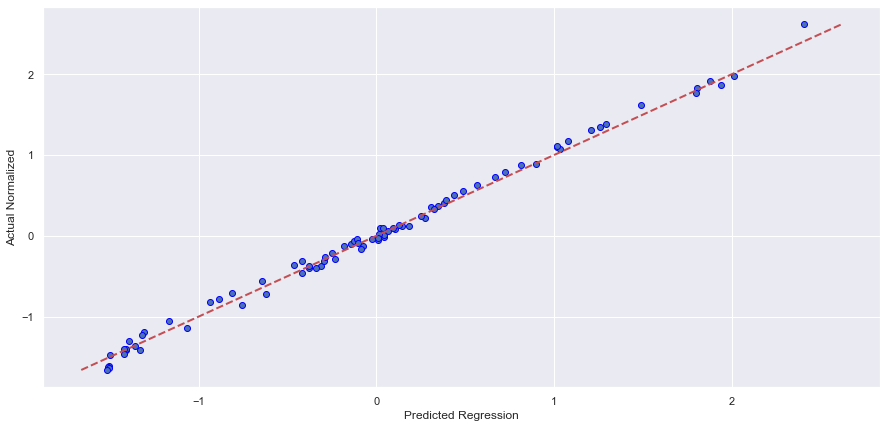

In [72]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.svm_predicted_norm, results.actual_norm, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual_norm.min(), results.actual_norm.max()], [results.actual_norm.min(), results.actual_norm.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Regression')

# set label in Y
ax.set_ylabel('Actual Normalized')

# to show the plot
plt.show()

Can be seen on the graph such a change when compared with SVM Not normalized

Transposing the dataframe for Aesthetics purposes

In [73]:
errors_transposed = errors.T
errors_transposed

Metrics,MAE,MSE,RMSE,r2
Linear_regression,0.796271,1.539164,1.240631,0.999157
Regression_Tree,3.144109,22.463621,4.739580,0.987702
Regression_Lasso,1.208602,3.646354,1.909543,0.998004
SVM_Regression,12.520108,456.083021,21.356100,0.750310
Linear_Regression_Norm,0.018260,0.000809,0.028450,0.999157
Regression_Tree_Norm,0.076258,0.013131,0.114592,0.986329
Regression_Lasso_Norm,0.086498,0.012066,0.109843,0.987439
SVM_Regression_Norm,0.059528,0.005159,0.071826,0.994629


### Neural Network

Neural network is an exercise that I have done as a personal challenge and to gain knowledge on this interesting topic.

In order to do a neural Network, experts recommend normalizing the data and since it has been normalized then I will use the previously normalized data.


In [74]:
import tensorflow as tf
from tensorflow import keras

The first step is to obtain all the columns again and create X and y:

In [ ]:
X = test.iloc[:, 1:] # All the variables but OIC_price
y = test.iloc[:, 0] # OIC_price

Then the model is saved as a numpy with the 2 sets of data inputs = X and OIC_price = y

In [76]:
# saves as numpy file, called neural_network, with 2 sets of data X and y
np.savez("neural_network", inputs = X, OIC_price = y)

Load the file again or just work with it, in this case it was loaded again

In [77]:
# loads the file again
Neural_Network = np.load("neural_network.npz")

If you want to see the Inputs and Output

In [78]:
#print("inputs:", Neural_Network["inputs"])
#print("OIC_price:", Neural_Network["OIC_price"])

Then the number of input layers is 12 as there are 12 columns in the data set in order to obtain the variable that we need, in this case is the column OIC_price, and this is the output layer, or basically what we want to predict.

In [79]:
input_size=12 # units = 12, is the number of input layers (in this case, I need all 12 columns, which is 12 neurons as input)
output_size=1 # units = 1, is the number of output layers (in this case, I need OIC_price, which is 1 neuron as outpu)

A dense layer is needed (from all 12 neurons to one neuron, or basically from all 12 columns to the predicted column OIC_price)

Then I have to build a model for the layers, in this case, the Sequential (a sequence of layers stacked one after another) that is for a neural network that is not advanced.

In [80]:
# dense layer (from all neurons to one neuron, in this case as an output, specify the input and output)
# I have to build a model for the layers, in this case is the Sequential 
# (is a sequence of layers stacked one after another) 
# that is for a neural network that is not advanced

models = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

I have to prepare the model to be trained (this is called a compiler), and I will use an optimizer called Adam, which allows the network to know how to use the bias and weights in an efficient way, so it learns, instead of unlearning ( gets better step by step).

The learning rate is 0.1, which indicates how to adjust the weights and bias (increasing in steps of 0.1)


In [81]:
# I have to prepare the model to be trained (this is called compiler)
# I use an optimizer called Adam, allows the network how to use the bias and weights in an efficient way
# so it learns, instead of unlearning ( get better step by step)
# learning rate is 0.1, which indicates how to adjust the weights and bias

models.compile(optimizer = tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

To train the model, I choose epochs  = 400, this is how many times I want it to loop (1 loop means checking all 272 entries), usually the more epochs the better training but only until a certain point.

In [82]:
# training the model
# epochs  = 400 , is how many times I want it to loop (1 loop mean checking all 272 entries)
# usually the more epochs better training but only until certain point
# verbose = false, so it doesn't print anything

print('Begining training...')

# Start measuring the time it takes to train the model
start = time.time()

history  = models.fit(Neural_Network["inputs"], Neural_Network["OIC_price"], epochs=400, verbose=False)

# finish measuring the time it takes to train the model
end = time.time()

# total training time
nn_time = end - start

print('Finished training the model...')
print(f'\nTraining time: {nn_time}s')

Begining training...
Finished training the model...

Training time: 5.8032777309417725s


The algorithm trained the model in 8.3 seconds

I want to see the Weights and the Bia

In [83]:
# get the weights and bias
weights = models.layers[0].get_weights()[0]
bias = models.layers[0].get_weights()[1]

In [84]:
print(f'These are the bias variables: \n{bias}')
print(f'These are the layer variables: \n{weights}')

These are the bias variables: 
[-0.00995068]
These are the layer variables: 
[[ 0.3245846 ]
 [ 0.45992702]
 [-0.62533545]
 [ 0.35654527]
 [ 0.05810709]
 [-0.52481854]
 [ 0.7836278 ]
 [ 0.13894737]
 [ 0.42131856]
 [-0.34491777]]


 I want to measure the Mean Squared Error MSE in order to measure the RMSE

In [85]:
# to measure the mean squared error
from sklearn.metrics import mean_squared_error

OIC_price = Neural_Network['OIC_price'].round(1)

mean_squared_error(y, OIC_price, squared=False)

0.028628030460665175

In [86]:
rmse_nn = np.sqrt(mean_squared_error(y, OIC_price, squared=False))
print(f'\nrmse = {rmse_nn}')


rmse = 0.16919819875124315


A very good RMSE, but not as good as the Linear Regression or the other Algorithms.

The plot of the graph of Predicted Values vs Input

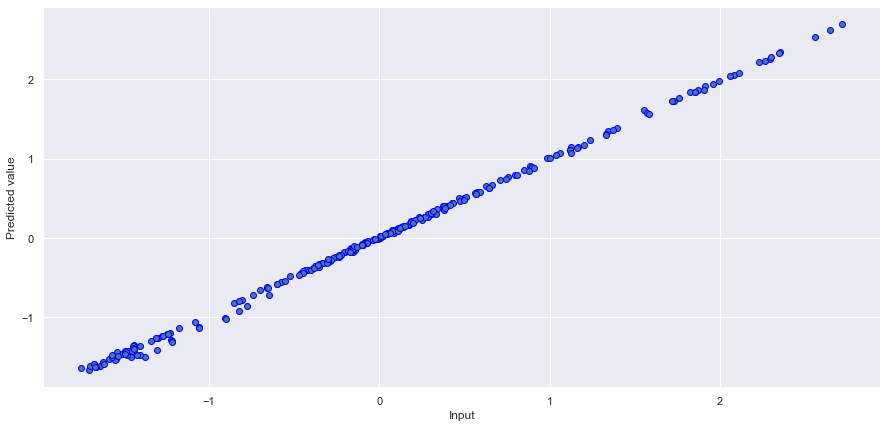

In [87]:
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(np.squeeze(models.predict_on_batch(Neural_Network['inputs'])),np.squeeze(Neural_Network['OIC_price']), edgecolors=(0, 0, 1))

# set label in X
ax.set_xlabel('Input')

# set label in Y
ax.set_ylabel('Predicted value')

plt.show()

To measure the loss or basically how bad are the results with each loop that was done.

From here I can say that the system could have been trained with much fewer loops or epochs


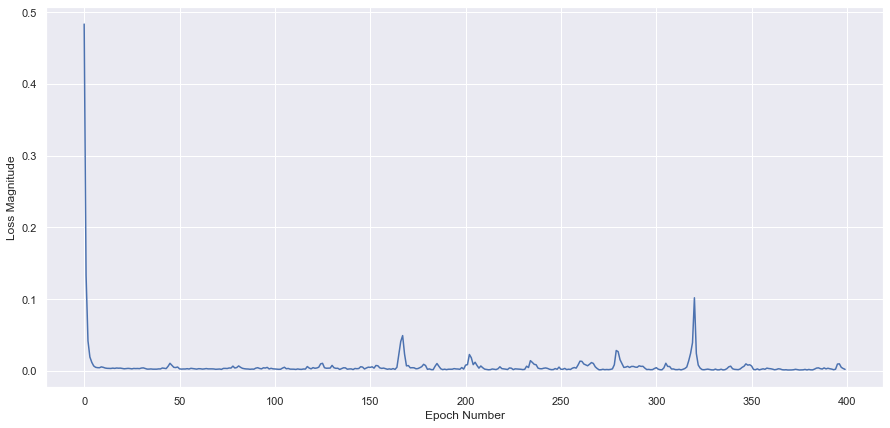

In [88]:
# to see the loss, basically how bad are the results with each loop that it did
import matplotlib.pyplot as plt
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Start of Machine Learning Regression Algorithms with Cross Validation

## Regressions Not  Normalized

### Methodology
In this section, the algorithms will be run without being normalized and further ahead they will be Normalized

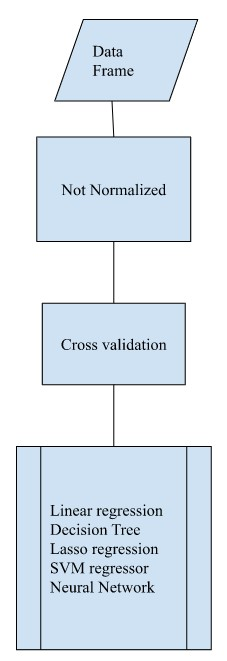

### Split the data frame intro X and y

In [89]:
X = test.iloc[:, [1,2,3,5,7,8,9,10,11,12]] # variables of the model
y = test.iloc[:, 0] # OIC_price

### Cross Validation

In this exercise the number of splits  k = 5, with Shuffle = True

In [90]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

 # number of splits
k = 5

# cross-validation method
cv = KFold(n_splits=k, random_state=10, shuffle=True)

cont = 1
# splits data into training and test set.
for train_index, test_index in cv.split(X, y):
    print(f'\nFold:{cont}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    print("\nTrain:", train_index, "\n\nValidation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cont = cont + 1


Fold:1, Train set: 217, Test set:55

Train: [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  22  23  25  27  28  29  30  31  32  33  34  36  37  39  40  41  42  44
  45  46  48  50  51  52  53  54  55  57  58  62  63  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  81  82  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  99 100 101 102 103 104 106 107 108 109
 110 112 115 116 117 118 119 120 122 123 124 125 126 127 128 132 133 134
 135 136 137 138 139 140 141 143 144 145 146 147 148 150 151 152 153 154
 156 157 158 160 161 162 163 164 165 166 168 169 172 174 175 177 178 179
 182 184 185 186 187 188 189 190 191 195 196 197 198 199 200 201 202 203
 204 206 207 208 209 210 212 213 215 216 218 219 220 221 222 223 224 225
 226 227 228 229 231 232 234 236 237 238 239 240 241 243 244 245 246 247
 248 249 251 252 253 254 255 256 257 259 260 261 262 263 264 265 267 268
 269] 

Validation: [ 10  19  20  21  24  26  35  38  43  47  49  56  59  60  6

### Linear Regression

On this set, the scoring is measured with the MSE, and then take the average of all five scores, then proceed to take the square root to obtain the RMSE.

In [91]:
#importing th necesary libraries
from sklearn.linear_model import LinearRegression

# create the linear regression model
model_regression = LinearRegression()

In [92]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_lineal = cross_val_score(model_regression, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
lrcv_time = end - start

print(f'Training time: {lrcv_time}s')

print(f'\nScore on each fold {scores_lineal}')
print(f'\nAverage of scores {scores_lineal.mean()*-1}')
rmse_lineal = np.sqrt(-scores_lineal.mean())
print(f'\nrmse = {rmse_lineal}')

Training time: 0.045932769775390625s

Score on each fold [-7.9966318  -3.62970645 -4.5336746  -1.68881897 -0.49033276]

Average of scores 3.667832914409396

rmse = 1.915158717811502


cross_val_score() reports scores in ascending order (largest score is best). But MSE is naturally descending scores (the smallest score is best). Thus we need to use ‘neg_mean_squared_error’ to invert the sorting. This also results in the score to be negative even though the value can never be negative. "https://www.andrewgurung.com/2018/12/28/regression-model-evaluation-mean-squared-error/"

3.3.1.1. Common cases: predefined values
For the most common use cases, you can designate a scorer object with the scoring parameter; the table below shows all possible values. All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric. "https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter" (Buitinick et al., 2011)

Seems that the cross-validation is not helping in this case, however, we will have to wait until the data has been normalized to see how it behaves.

### Decision Tree Regressor

This regressor is still behaving very quite poor, even more than the Linear Regression CV

In [93]:
# import the necesary libraries
from sklearn.tree import DecisionTreeRegressor

# create the model
model_tree = DecisionTreeRegressor(random_state=10)

In [94]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_tree = cross_val_score(model_tree, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
dtcv_time = end - start

print(f'Training time: {dtcv_time}s')

print(f'\nScore on each fold {scores_tree}')
print(f'\nAverage of scores {scores_tree.mean()*-1}')
rmse_decision_tree = np.sqrt(-scores_tree.mean())
print(f'\nrmse = {rmse_decision_tree}')

Training time: 0.05221843719482422s

Score on each fold [-88.10274436 -95.27783347 -48.00090481 -38.16288283 -44.28817509]

Average of scores 62.76650811339336

rmse = 7.922531673233838


### LASSO Regressor (Least Absolute Shrinkage and SelectionOperator)

This regressor is still bad, better than the Decision Tree CV but worst than Linear Regression CV

In [95]:
# import the necesary libraries
from sklearn.linear_model import Lasso

# creates the model
#lasso_regressor = Lasso(fit_intercept=False)
lasso_regressor = Lasso(beta)

In [96]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_lasso = cross_val_score(lasso_regressor, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
lassocv_time = end - start

print(f'Training time: {lassocv_time}s')

print(f'\nScore on each fold {scores_lasso}')
print(f'\nAverage of scores {scores_lasso.mean()*-1}')
rmse_lasso = np.sqrt(-scores_lasso.mean())
print(f'\nrmse = {rmse_lasso}')

Training time: 0.040795087814331055s

Score on each fold [-22.85179754  -1.80901588 -14.7165008   -1.38908212  -7.68926488]

Average of scores 9.691132244304956

rmse = 3.113058342579682


### SVM Support Vector Machine Regressor

This regressor has the worst of all the RMSE’s, but as we know, SVM is very sensible tor Normalization

In [97]:
# import the necesary libraries
from sklearn.svm import SVR

# creates the model
svm_regressor = SVR(kernel = 'rbf') # radial base function or gaussian

In [98]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_svm = cross_val_score(svm_regressor, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
svmcv_time = end - start

print(f'Training time: {svmcv_time}s')

print(f'\nScore on each fold {scores_svm}')
print(f'\nAverage of scores {scores_svm.mean()*-1}')
rmse_svm = np.sqrt(-scores_svm.mean())
print(f'\nrmse = {rmse_svm}')

Training time: 0.06221270561218262s

Score on each fold [-3502.41479023    -8.09038181 -2478.37239504   -78.36867538
  -926.03160841]

Average of scores 1398.6555701758805

rmse = 37.39860385329752


## Regressions Normalized

### Methodology
In this section, the algorithms will be run Normalized using  StandardScaler()

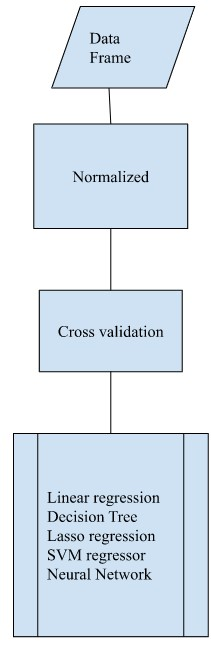

### Split the data frame intro Train (X) and Test (y)

In [99]:
# creates X and y, with All the columns for X and for y = OIC_price
X = test.iloc[:, [1,2,3,5,7,8,9,10,11,12]].values  # All the variables but OIC_price, values: to get them as numpy array
y = test.iloc[:, 0].values # OIC_price, values to get them as numpy array

### Normalize with StandarScaler()

In [100]:
# Function that applies standarization with the Standar deviation method 
from sklearn.preprocessing import StandardScaler

# normalizing with standar deviation
X_scaler = StandardScaler()
y_scaler = StandardScaler()
    
# fits and transforms the data
X = X_scaler.fit_transform(X)
y = y.reshape(-1,1) # reshape because the array has to be a 2D array or (1 column, many rows..)
y = y_scaler.fit_transform(y)   

# converting the numpy array back into dataframe
X = pd.DataFrame(X, columns = ['Colombia_ny', 'Colombia_europe', 'Colombia_average', 'Other_europe',
                               'Brazil_ny', 'Brazil_europe', 'Brazil_average', 'Robustas_ny', 'Robustas_europe',
                               'Robustas_average'])

y = np.squeeze(y) # turns the from 2 dimensions to 1 dimension
y = pd.Series(y)

### Cross Validation

In this exercise the number of splits  k = 5, with Shuffle = True

In [101]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

 # number of splits
k = 5

# cross-validation method
cv = KFold(n_splits=k, random_state=10, shuffle=True)

cont = 1
# splits data into training and test set.
for train_index, test_index in cv.split(X, y):
    print(f'\nFold:{cont}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    print("\nTrain:", train_index, "\n\nValidation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    cont = cont + 1


Fold:1, Train set: 217, Test set:55

Train: [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  22  23  25  27  28  29  30  31  32  33  34  36  37  39  40  41  42  44
  45  46  48  50  51  52  53  54  55  57  58  62  63  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  81  82  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  99 100 101 102 103 104 106 107 108 109
 110 112 115 116 117 118 119 120 122 123 124 125 126 127 128 132 133 134
 135 136 137 138 139 140 141 143 144 145 146 147 148 150 151 152 153 154
 156 157 158 160 161 162 163 164 165 166 168 169 172 174 175 177 178 179
 182 184 185 186 187 188 189 190 191 195 196 197 198 199 200 201 202 203
 204 206 207 208 209 210 212 213 215 216 218 219 220 221 222 223 224 225
 226 227 228 229 231 232 234 236 237 238 239 240 241 243 244 245 246 247
 248 249 251 252 253 254 255 256 257 259 260 261 262 263 264 265 267 268
 269] 

Validation: [ 10  19  20  21  24  26  35  38  43  47  49  56  59  60  6

### Linear Regression Normalized

Here we have a much better RMSE, we are tending towards zero

In [102]:
#importing th necesary libraries
from sklearn.linear_model import LinearRegression

# create the linear regression model
model_regression_norm = LinearRegression()

In [103]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_lineal_norm = cross_val_score(model_regression_norm, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
lrncv_time = end - start

print(f'Training time: {lrncv_time}s')

print(f'\nScore on each fold {scores_lineal_norm}')
print(f'\nAverage of scores {scores_lineal_norm.mean()*-1}')
rmse_norm_lineal = np.sqrt(-scores_lineal_norm.mean())
print(f'\nrmse = {rmse_norm_lineal}')

Training time: 0.037109375s

Score on each fold [-0.00420517 -0.00190875 -0.00238411 -0.0008881  -0.00025785]

Average of scores 0.001928794662027267

rmse = 0.043918044833840986


### Decision Tree Regressor Normalized

This algorithm has improved a lot when being Normalized, since the previous decision Tree CV had a RMSE of about 7

In [104]:
# import the necesary libraries
from sklearn.tree import DecisionTreeRegressor

# create the model
model_tree_norm = DecisionTreeRegressor(random_state=10)

In [105]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_tree_norm = cross_val_score(model_tree_norm, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
dtncv_time = end - start

print(f'\nTraining time: {dtncv_time}s')

print(f'Score on each fold {scores_tree_norm}')
print(f'\nAverage of scores {scores_tree_norm.mean()*-1}')
rmse_norm_decision_tree = np.sqrt(-scores_tree_norm.mean())
print(f'\nrmse = {rmse_norm_decision_tree}')


Training time: 0.04824328422546387s
Score on each fold [-0.04354205 -0.03958679 -0.0266162  -0.01776122 -0.02346921]

Average of scores 0.03019509650479573

rmse = 0.17376736317500974


### LASSO Regressor (Least Absolute Shrinkage and SelectionOperator)

The algorithm is performing really well since the RMSE is tending towards zero

In [106]:
# import the necesary libraries
from sklearn.linear_model import Lasso

# creates the model
#lasso_regressor = Lasso(fit_intercept=False)
lasso_regressor_norm = Lasso(alpha)

In [107]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_lasso_norm = cross_val_score(lasso_regressor_norm, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
lassoncv_time = end - start

print(f'Training time: {lassoncv_time}s')

print(f'\nScore on each fold {scores_lasso_norm}')
print(f'\nAverage of scores {scores_lasso_norm.mean()*-1}')
rmse_norm_lasso = np.sqrt(-scores_lasso_norm.mean())
print(f'\nrmse = {rmse_norm_lasso}')

Training time: 0.042005300521850586s

Score on each fold [-0.23701501 -0.00497385 -0.08474799 -0.00344022 -0.01105593]

Average of scores 0.06824659984517778

rmse = 0.26124050192337667


### SVM Support Vector Machine Regressor Normalized

This regressor had a RMSE of 37.39 and has improved all the way to 0.25, this confirms that is always best to normalize the data in order to obtain much better results

In [108]:
# import the necesary libraries
from sklearn.svm import SVR

# creates the model
svm_regressor_norm = SVR(kernel = 'rbf') # radial base function or gaussian

In [109]:
# Start measuring the time it takes to train the model
start = time.time()

# cross validation to evaluate the model
scores_svm_norm = cross_val_score(svm_regressor_norm, X, y, cv = k, scoring='neg_mean_squared_error')

# finish measuring the time it takes to train the model
end = time.time()

# total training time
svmncv_time = end - start

print(f'Training time: {svmncv_time} s')

print(f'\nScore on each fold {scores_svm_norm}')
print(f'\nAverage of scores {scores_svm_norm.mean()*-1}')
rmse_norm_svm = np.sqrt(-scores_svm_norm.mean())
print(f'\nrmse = {rmse_norm_svm}')

Training time: 0.04670071601867676 s

Score on each fold [-0.2404445  -0.0063709  -0.07527134 -0.00384803 -0.00245652]

Average of scores 0.06567825455570615

rmse = 0.256277690319907


# Efficiency or Timing of the algorithms

In order to measure the time each model takes to be trained or tested, a data frame was created 
with the values of each algorithm when being timed.


In [110]:
# Efficiency, by measuring the time each model took to be trained or tested
times =  pd.DataFrame()
times['names'] = ['Linear_regression', 'Decision_tree', 'LASSO_regression', 'SVM_regression',
                 'Linear_regression_norm', 'Decision_tree_norm', 'LASSO_regression_norm', 'SVM_regression_norm', 
                  'Linear_regression_cv', 'Decision_tree_cv', 'LASSO_regression_cv', 'SVM_regression_cv', 
                 'Linear_regression_norm_cv', 'Decision_tree_norm_cv', 'LASSO_regression_norm_cv', 'SVM_regression_norm_cv']

times['times'] = [lr_time, dt_time, lasso_time, svm_time,
                lrn_time, dtn_time, lasson_time, svmn_time,
                lrcv_time, dtcv_time, lassocv_time, svmcv_time,
                lrncv_time, dtncv_time, lassoncv_time, svmncv_time,]

times.set_index('names', inplace = True) # sets the index
times

,times
names,
Linear_regression,0.003994
Decision_tree,0.001998
LASSO_regression,0.005363
SVM_regression,0.005997
Linear_regression_norm,0.002999
Decision_tree_norm,0.002007
LASSO_regression_norm,0.003997
SVM_regression_norm,0.003003
Linear_regression_cv,0.045933


The slowest algorithm is SVM Regression CV when doing Cross Validation and the same algorithm when being normalized and using the same Cross-Validation technique has a time that is much less

The fastest algorithm is SVM regression Normalized when doing the exercise with Train and test validation sets, and the same algorithm when doing Cross validation became the slowest


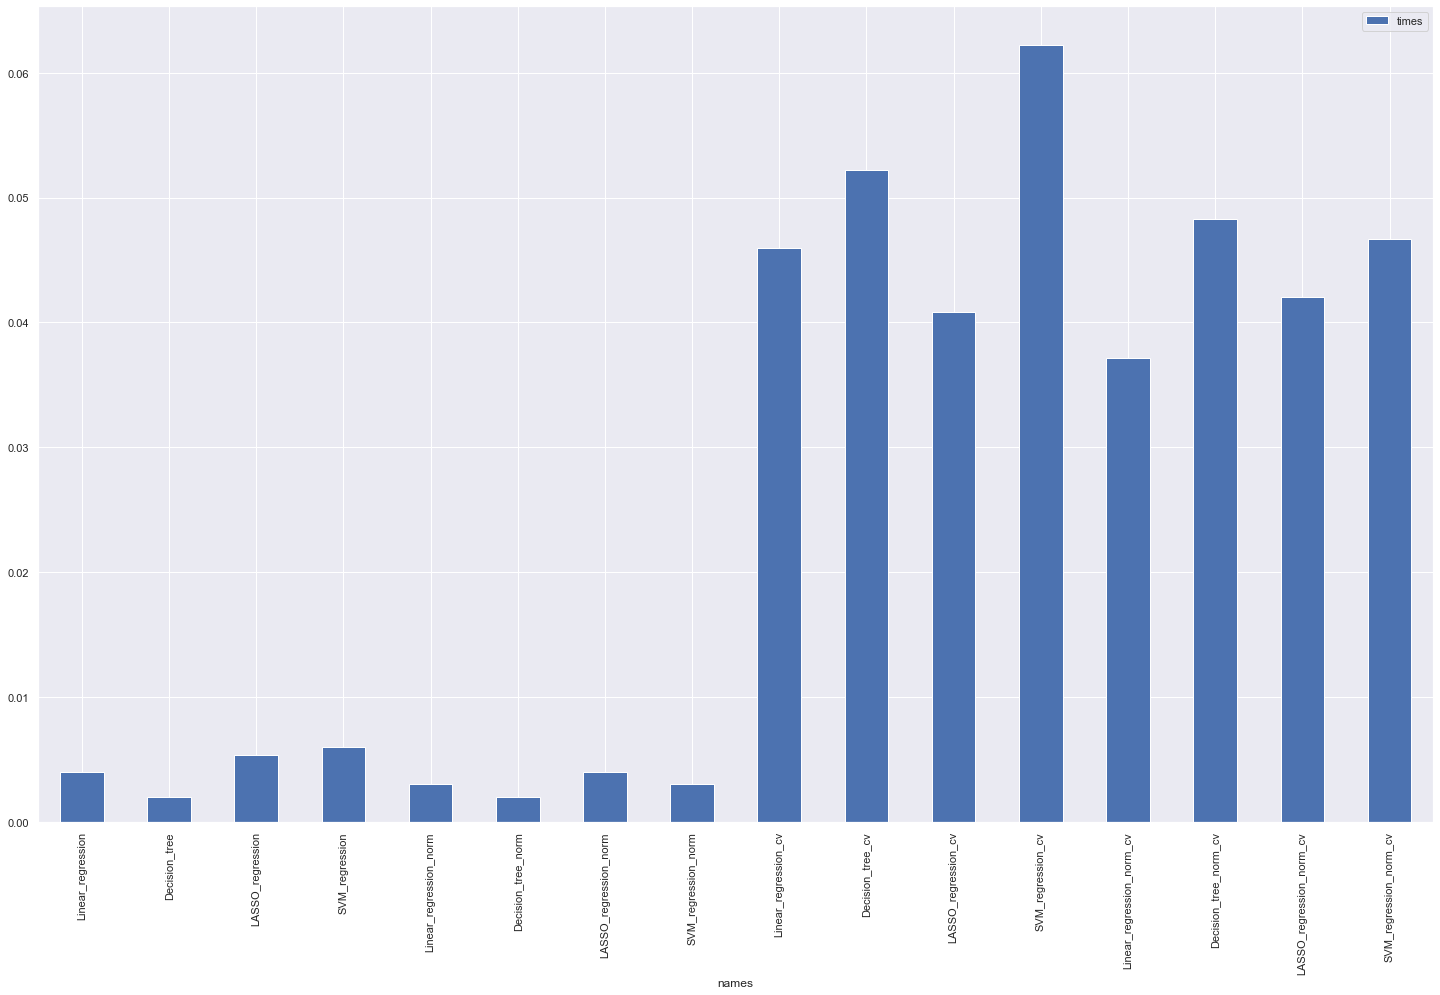

In [111]:
# dropping as they have very high numbers
#metrics.drop(['SVM_Regression', 'Regression_Tree'], inplace = True)
times.plot(kind='bar',figsize=(25,15))
plt.show()

Note that there is a difference using cross-validation vs Training and testing set, where using Cross-validation increases the timing of the algorithms by almost more than double

The slowest algorithm

In [112]:
# checking the maximum number in the column times
times[times['times'] == times['times'].max()]

,times
names,
SVM_regression_cv,0.062213


The fastest algorithm

In [113]:
# checking the minimum number in the column times
times[times['times'] == times['times'].min()]

,times
names,
Decision_tree,0.001998


# Effectiveness in Cross Validation

In [114]:
metrics =  pd.DataFrame()
metrics['Algorithm'] = ['Linear_regression', 'Regression_Tree', 'Regression_Lasso', 'SVM_Regression',
                 'Linear_Regression_Norm', 'Regression_Tree_Norm', 'Regression_Lasso_Norm', 'SVM_Regression_Norm']


metrics['MSE'] = [scores_lineal.mean()*-1, scores_tree.mean()*-1, scores_lasso.mean()*-1, scores_svm.mean()*-1,
                          scores_lineal_norm.mean()*-1, scores_tree_norm.mean()*-1, scores_lasso_norm.mean()*-1, 
                          scores_svm_norm.mean()*-1]

metrics['RMSE'] = [rmse_lineal, rmse_decision_tree, rmse_lasso, rmse_svm, rmse_norm_lineal, rmse_norm_decision_tree,
                rmse_norm_lasso, rmse_norm_svm]

metrics.set_index('Algorithm', inplace = True) # sets the index

metrics

,MSE,RMSE
Algorithm,,
Linear_regression,3.667833,1.915159
Regression_Tree,62.766508,7.922532
Regression_Lasso,9.691132,3.113058
SVM_Regression,1398.655570,37.398604
Linear_Regression_Norm,0.001929,0.043918
Regression_Tree_Norm,0.030195,0.173767
Regression_Lasso_Norm,0.068247,0.261241
SVM_Regression_Norm,0.065678,0.256278


Can be seen that the most effective algorithm when doing Cross Validation, is the algorithm of Linear Regression Normalized, followed by Regression tree Normalized, note that SVM Regression and Regression Tree are very bad when not normalized, but Regression tree becomes really good once has been normalized.

Table measuring MSE and RMSE but dropping SVM_Regression and Regression_tree

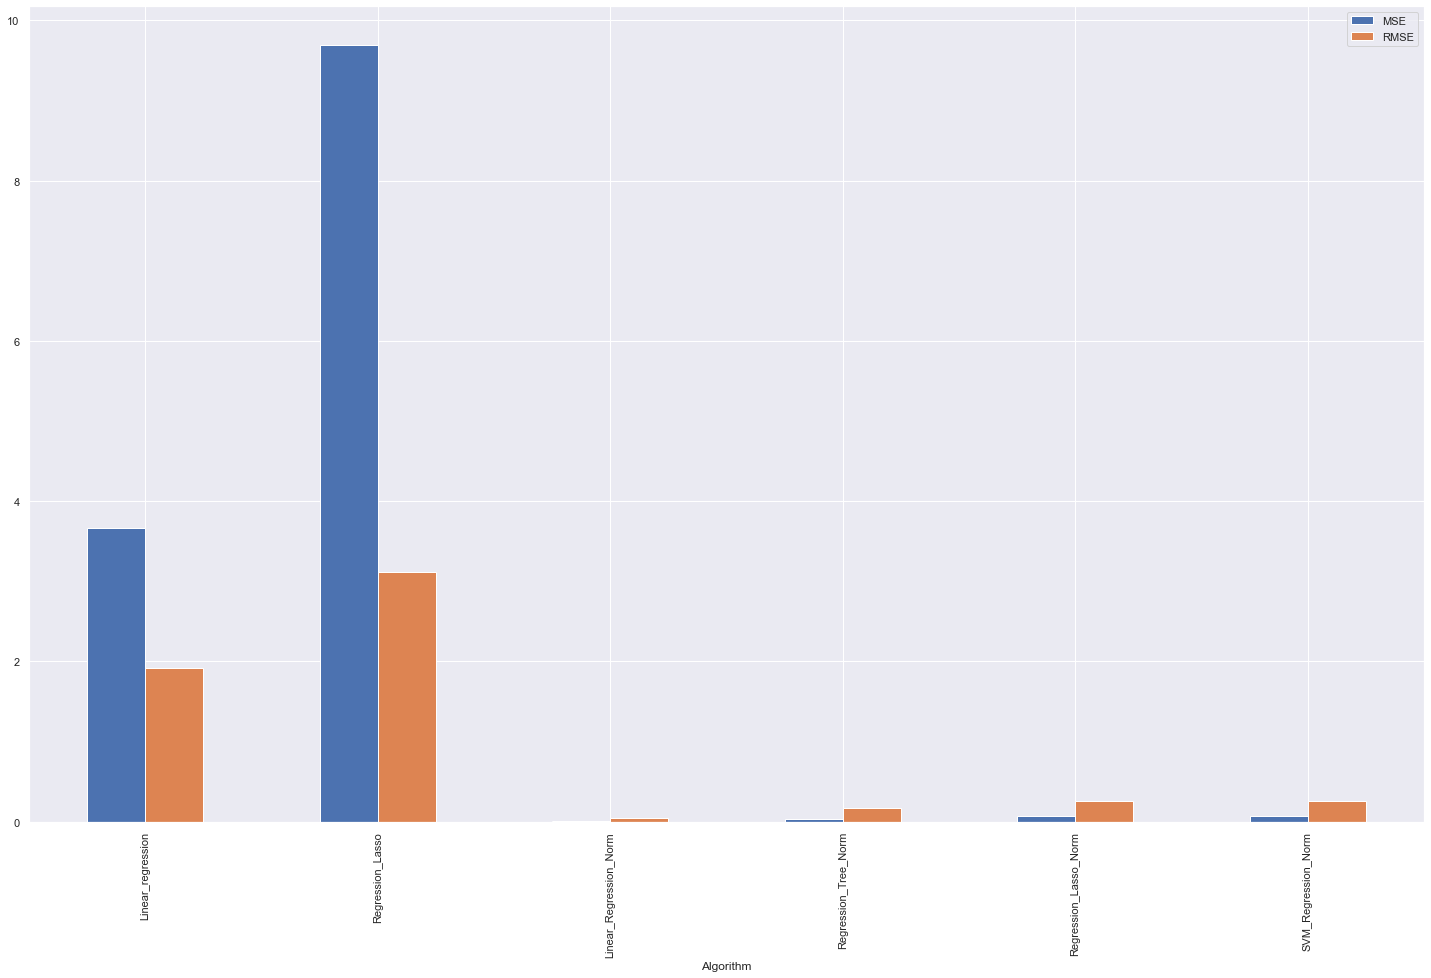

In [115]:
metrics_droped = metrics.copy()

# dropping as they have very high numbers
metrics_droped.drop(['SVM_Regression', 'Regression_Tree'],inplace = True)
metrics_droped.plot(kind='bar',figsize=(25,15))
plt.show()

# Effectiveness in Train set and Test set 

In [116]:
# transposing the data frame
errors = errors.T

errors_droped = errors.copy()

# dropping columns r2 and MAE
errors_droped = errors_droped.drop(columns = ['r2', 'MAE'])
errors_droped

Metrics,MSE,RMSE
Linear_regression,1.539164,1.240631
Regression_Tree,22.463621,4.739580
Regression_Lasso,3.646354,1.909543
SVM_Regression,456.083021,21.356100
Linear_Regression_Norm,0.000809,0.028450
Regression_Tree_Norm,0.013131,0.114592
Regression_Lasso_Norm,0.012066,0.109843
SVM_Regression_Norm,0.005159,0.071826


Can be seen that the best algorithm when having a training set and testing set is Linear regression Normalized followed by SVM Regression Normalized.
Note that SVM Regression and Regression Tree had to be dropped as they both have very high numbers, and once they have been normalized they perform really well, which explains why is good to normalize when doing linear regression problems.

Table measuring MSE and RMSE but dropping SVM_Regression and Regression_tree


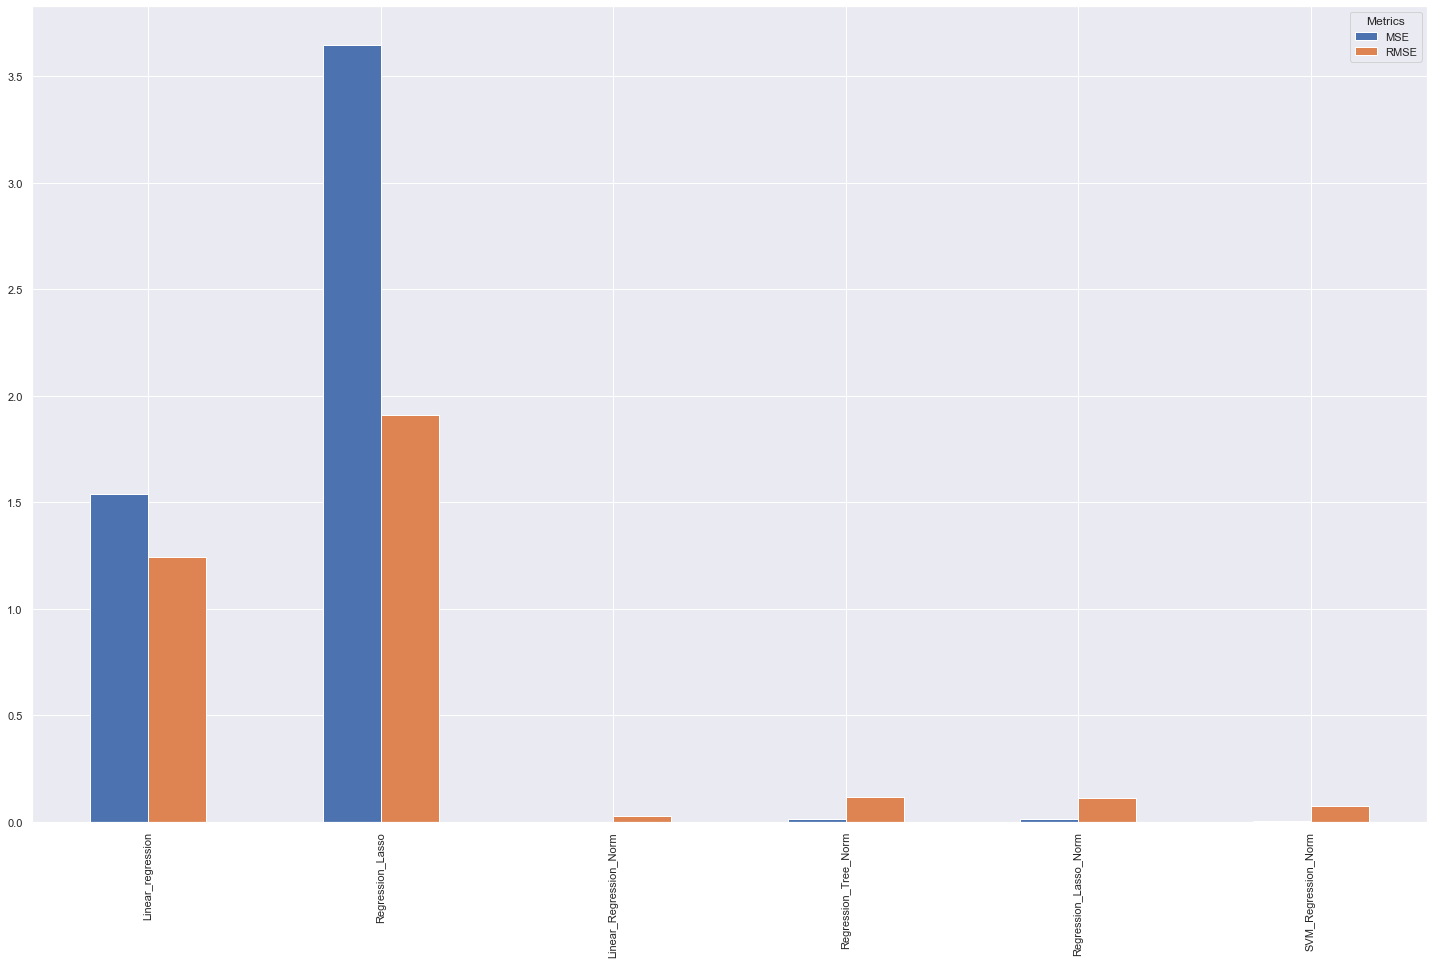

In [117]:
# dropping SVM_Regression and Regression_Tree as they have very high numbers
errors_droped.drop(['SVM_Regression', 'Regression_Tree'], inplace = True)
errors_droped.plot(kind='bar',figsize=(25,15))
plt.show()

When comparing both results side by side, the following table is obtained

In [118]:
# comparing both data frames
comparation=errors_droped.compare(metrics_droped)
comparation

Metrics                      MSE                RMSE          
                            self     other      self     other
Linear_regression       1.539164  3.667833  1.240631  1.915159
Regression_Lasso        3.646354  9.691132  1.909543  3.113058
Linear_Regression_Norm  0.000809  0.001929  0.028450  0.043918
Regression_Tree_Norm    0.013131  0.030195  0.114592  0.173767
Regression_Lasso_Norm   0.012066  0.068247  0.109843  0.261241
SVM_Regression_Norm     0.005159  0.065678  0.071826  0.256278

can be seen from the graph, that the best algorithm to evaluate the model is the Linear Regression Normalized as it has the minimum values in both exercises.
Please note that SVM_Regression, Regression_Tree, and 'Regression_Lasso have been dropped from the graph due that their high values will make disappearing from the other values on the graph.


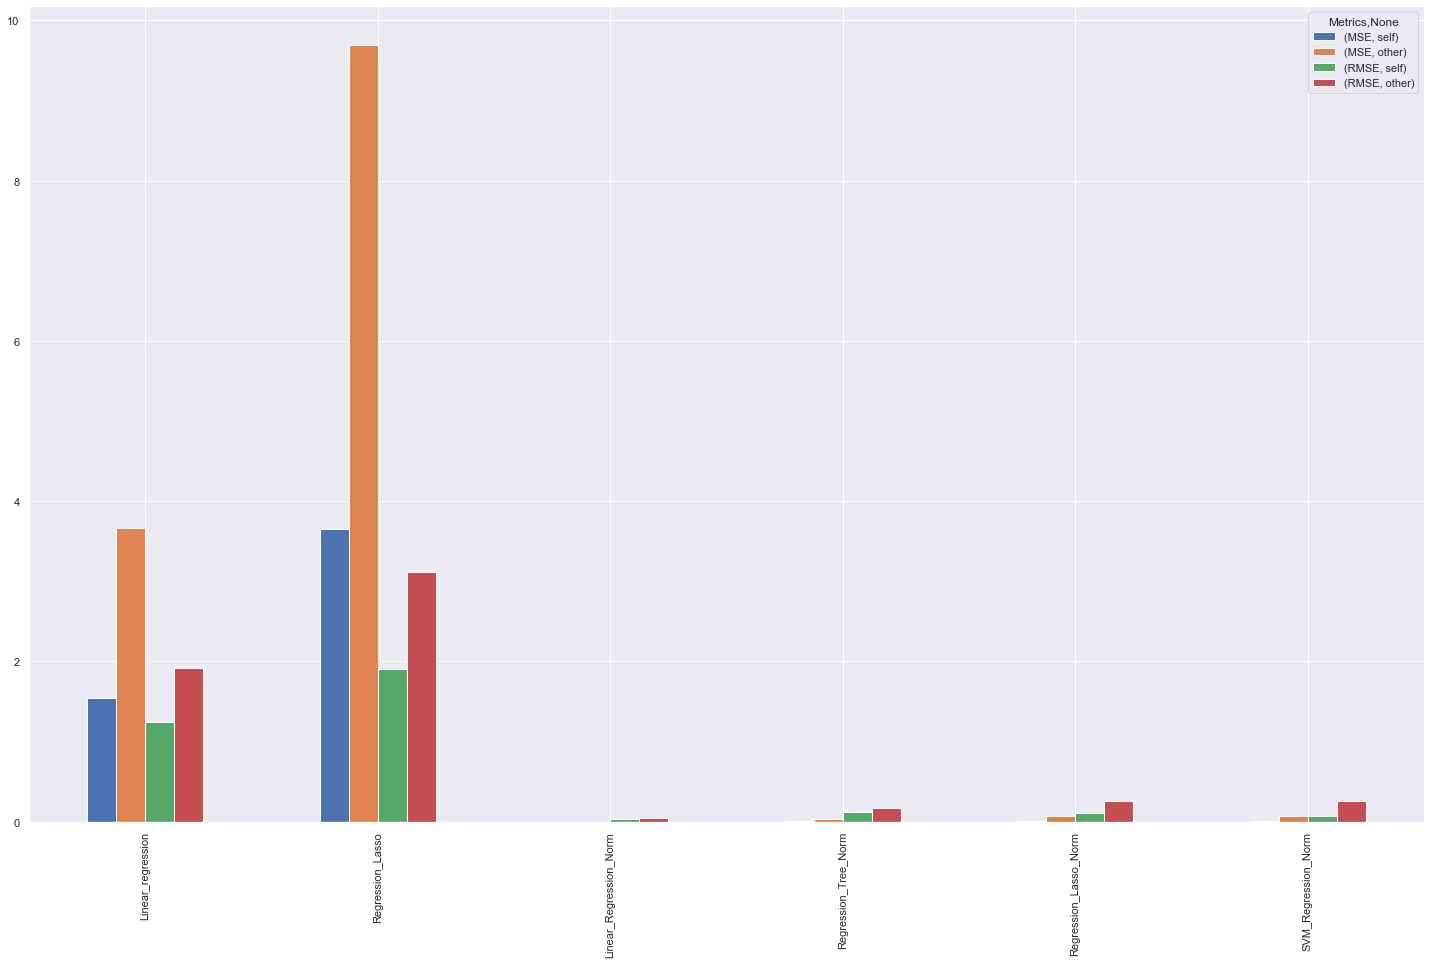

In [119]:
# dropping 'SVM_Regression', 'Regression_Tree' and 'Regression_Lasso' as they are quite high
#comparation.drop(['SVM_Regression', 'Regression_Tree','Regression_Lasso'], inplace = True)
comparation.plot(kind='bar',figsize=(25,15))
plt.show()

Linear Regression Normalized has the lowest values above all.
SVM_Regression, Regression_Tree and Regression_Lasso have been droped as they are quite high in values and will make disappear the other values on the graph

Now, there are different algorithms that excel in different categories, so which should be chosen?
in this case I will standarize everything to put it on a common scale (Z-Score) in order to compare and then get the average, and from here select the minimum values


In [120]:
metrics['times'] = [lrcv_time, dtcv_time, lassocv_time, svmcv_time,lrncv_time, dtncv_time, lassoncv_time, svmncv_time,]
metrics.drop('MSE', axis = 1, inplace = True)
metrics

,RMSE,times
Algorithm,,
Linear_regression,1.915159,0.045933
Regression_Tree,7.922532,0.052218
Regression_Lasso,3.113058,0.040795
SVM_Regression,37.398604,0.062213
Linear_Regression_Norm,0.043918,0.037109
Regression_Tree_Norm,0.173767,0.048243
Regression_Lasso_Norm,0.261241,0.042005
SVM_Regression_Norm,0.256278,0.046701


Dataframe with Z-Score of each column

In [121]:
metrics['RMSE_zscore'] = stats.zscore(metrics['RMSE'])
metrics['times_zscore'] = stats.zscore(metrics['times'])
metrics

,RMSE,times,RMSE_zscore,times_zscore
Algorithm,,,,
Linear_regression,1.915159,0.045933,-0.373062,-0.133379
Regression_Tree,7.922532,0.052218,0.128262,0.731424
Regression_Lasso,3.113058,0.040795,-0.273096,-0.840238
SVM_Regression,37.398604,0.062213,2.588081,2.106467
Linear_Regression_Norm,0.043918,0.037109,-0.529220,-1.347330
Regression_Tree_Norm,0.173767,0.048243,-0.518383,0.184509
Regression_Lasso_Norm,0.261241,0.042005,-0.511084,-0.673733
SVM_Regression_Norm,0.256278,0.046701,-0.511498,-0.027722


Dataframe with the mean of both Z-scores

In [122]:
metrics['mean'] = (metrics['RMSE_zscore'] + metrics['times_zscore'])/2
metrics

,RMSE,times,RMSE_zscore,times_zscore,mean
Algorithm,,,,,
Linear_regression,1.915159,0.045933,-0.373062,-0.133379,-0.253220
Regression_Tree,7.922532,0.052218,0.128262,0.731424,0.429843
Regression_Lasso,3.113058,0.040795,-0.273096,-0.840238,-0.556667
SVM_Regression,37.398604,0.062213,2.588081,2.106467,2.347274
Linear_Regression_Norm,0.043918,0.037109,-0.529220,-1.347330,-0.938275
Regression_Tree_Norm,0.173767,0.048243,-0.518383,0.184509,-0.166937
Regression_Lasso_Norm,0.261241,0.042005,-0.511084,-0.673733,-0.592408
SVM_Regression_Norm,0.256278,0.046701,-0.511498,-0.027722,-0.269610


In [123]:
metrics[metrics['mean'] == metrics['mean'].min()]

,RMSE,times,RMSE_zscore,times_zscore,mean
Algorithm,,,,,
Linear_Regression_Norm,0.043918,0.037109,-0.52922,-1.34733,-0.938275


Once the values have been scaled and the mean has been calculated, the program will select the minimum value of the mean and this will be the best algorithm that performs based in Time and RMSE

Through almost all the exercises, the algorithm Linear Regression and Linear Regression Normalized look like the best answer, in the end, is  Linear Regression Normalized the one that has the highest score to predict the algorithm base on Time and RMSE.